In [2]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import sklearn as skl


In [3]:
#The data is written in a CSV file, so we're going to use Pandas function to read CSV file.

df_data = pd.read_csv('./korean_data.csv') #Plant 1 gen data load into df

df_data.sample(5) #show the samples of the data


generation(Wh)             datetime  temperature(C)  precipitattion(mm)  \
1001         28416.0  2022-05-12 17:00:00            19.1                 NaN   
3006          9312.0  2022-08-04 06:00:00            27.5                 NaN   
1999         58272.0  2022-06-23 07:00:00            24.3                 NaN   
5035             0.0  2022-10-27 19:00:00            14.9                 NaN   
7578             0.0  2023-02-10 18:00:00             6.7                 NaN   

      windspeed(m/s)  winddirection(degree)  humidity(%)  airpressure(hPa)  \
1001             2.4                     20         68.0            1000.9   
3006             1.6                    270         84.0            1000.8   
1999             2.1                    200         86.0             997.4   
5035             1.0                    360         67.0            1014.5   
7578             1.1                    200         65.0            1008.6   

      irradiance(hr)  radiation(MJ/m2)  amountofcloud  groundtemperature(C)  
1001             0.0               NaN           10.0                  24.1  
3006             0.0               NaN            2.0                  25.6  
1999             0.1               NaN            7.0                  24.1  
5035             NaN               NaN            0.0                  14.6  
7578             0.0              0.14            7.0                   6.4

In [4]:
# #Convert dates to datetime format
#The Generation csv use 2 different datetime formats, so have to convert like this

df_data["datetime"] = pd.to_datetime(df_data["datetime"])


In [5]:
#Dataset Info
print("Gen data info")
df_data.info()
df_data.describe()


Gen data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   generation(Wh)         8715 non-null   float64       
 1   datetime               8761 non-null   datetime64[ns]
 2   temperature(C)         8761 non-null   float64       
 3   precipitattion(mm)     674 non-null    float64       
 4   windspeed(m/s)         8761 non-null   float64       
 5   winddirection(degree)  8761 non-null   int64         
 6   humidity(%)            8761 non-null   float64       
 7   airpressure(hPa)       8761 non-null   float64       
 8   irradiance(hr)         4797 non-null   float64       
 9   radiation(MJ/m2)       875 non-null    float64       
 10  amountofcloud          8760 non-null   float64       
 11  groundtemperature(C)   8761 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memo

generation(Wh)             datetime  temperature(C)  \
count     8715.000000                 8761     8761.000000   
mean     70523.507745  2022-09-30 12:00:00       15.069250   
min          0.000000  2022-04-01 00:00:00      -13.200000   
25%          0.000000  2022-07-01 06:00:00        8.000000   
50%        144.000000  2022-09-30 12:00:00       15.900000   
75%     122304.000000  2022-12-30 18:00:00       22.700000   
max     389712.000000  2023-04-01 00:00:00       34.500000   
std     106749.030249                  NaN        9.237587   

       precipitattion(mm)  windspeed(m/s)  winddirection(degree)  humidity(%)  \
count          674.000000     8761.000000            8761.000000  8761.000000   
mean             1.491246        2.110615             220.150668    62.719769   
min              0.000000        0.000000               0.000000     6.000000   
25%              0.000000        1.200000             110.000000    45.000000   
50%              0.100000        2.000000             250.000000    65.000000   
75%              1.200000        2.900000             340.000000    81.000000   
max             29.100000        9.000000             360.000000    98.000000   
std              3.485823        1.177866             122.958953    22.810932   

       airpressure(hPa)  irradiance(hr)  radiation(MJ/m2)  amountofcloud  \
count       8761.000000     4797.000000        875.000000    8760.000000   
mean        1006.379192        0.531999          1.167074       4.804680   
min          962.000000        0.000000          0.000000       0.000000   
25%         1000.400000        0.000000          0.290000       0.000000   
50%         1006.900000        0.600000          1.050000       6.000000   
75%         1012.100000        1.000000          1.940000       9.000000   
max         1026.000000        1.000000          3.290000      10.000000   
std            7.660623        0.446294          0.924204       3.922337   

       groundtemperature(C)  
count           8761.000000  
mean              15.825545  
min              -11.800000  
25%                6.700000  
50%               16.300000  
75%               24.400000  
max               50.400000  
std               11.469165

In [6]:
#Sample Datapoints for verification
df_data.sample(10)


generation(Wh)            datetime  temperature(C)  precipitattion(mm)  \
5287         14592.0 2022-11-07 07:00:00             4.6                 NaN   
2984         87984.0 2022-08-03 08:00:00            28.6                 NaN   
7698             0.0 2023-02-15 18:00:00             2.7                 NaN   
580              0.0 2022-04-25 04:00:00            17.0                 NaN   
3058        267552.0 2022-08-06 10:00:00            31.8                 NaN   
945         145344.0 2022-05-10 09:00:00            16.1                 NaN   
1425        124464.0 2022-05-30 09:00:00            22.3                 0.0   
8595             0.0 2023-03-25 03:00:00             9.1                 NaN   
857          84816.0 2022-05-06 17:00:00            22.1                 NaN   
2698        100032.0 2022-07-22 10:00:00            25.5                 NaN   

      windspeed(m/s)  winddirection(degree)  humidity(%)  airpressure(hPa)  \
5287             1.0                    110         82.0            1013.4   
2984             2.8                    200         79.0            1002.5   
7698             2.5                     50         69.0            1020.1   
580              2.8                    270         81.0            1001.7   
3058             1.3                    320         63.0             996.9   
945              2.7                     20         67.0            1009.9   
1425             1.5                    160         40.0             992.7   
8595             2.3                    290         70.0            1010.2   
857              2.3                    140         61.0            1004.6   
2698             2.5                    340         71.0             996.2   

      irradiance(hr)  radiation(MJ/m2)  amountofcloud  groundtemperature(C)  
5287             0.0               NaN            0.0                   3.6  
2984             0.4               NaN            6.0                  28.8  
7698             0.0              0.15            5.0                   3.1  
580              NaN               NaN            4.0                  14.3  
3058             1.0               NaN            3.0                  35.7  
945              0.0               NaN            9.0                  17.9  
1425             0.0               NaN           10.0                  27.7  
8595             NaN               NaN           10.0                   8.8  
857              1.0               NaN            0.0                  26.1  
2698             0.1               NaN            7.0                  26.7

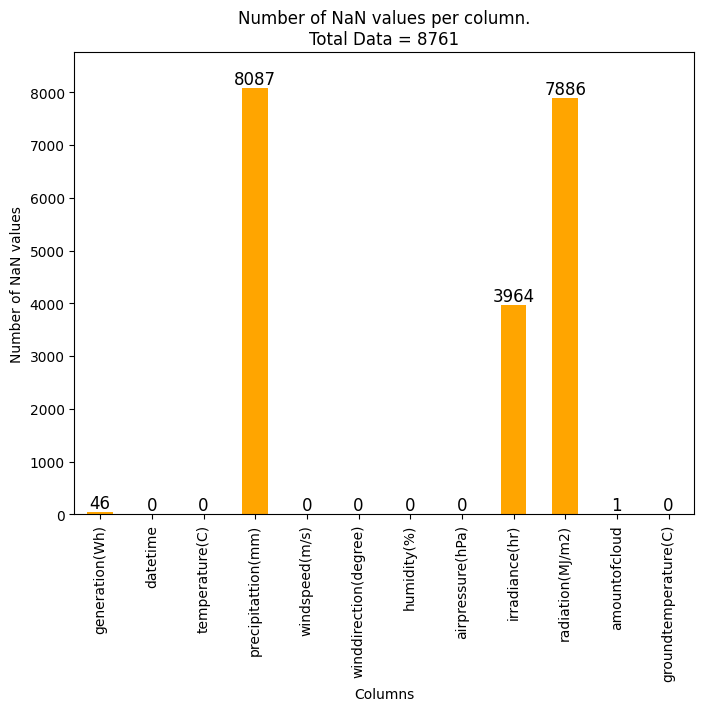

In [7]:
# Check for missing data

nan_counts = df_data.isna().sum()

ax = nan_counts.plot(kind='bar', figsize=(8, 6), color='orange')
# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Number of NaN values')
plt.title(f'Number of NaN values per column.\nTotal Data = {len(df_data)}')

# Add value labels above each bar
for i, value in enumerate(nan_counts):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)


plt.ylim(0, len(df_data))

# Show plot
plt.show()



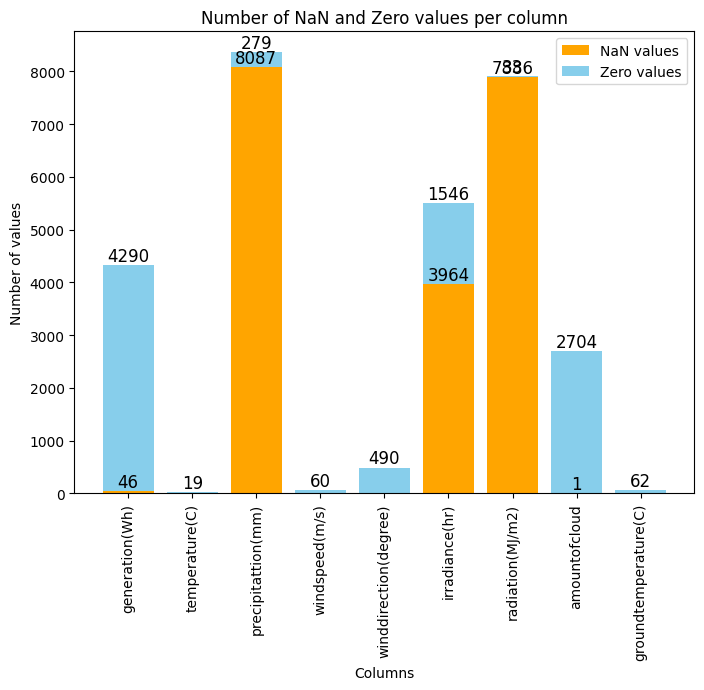

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of NaN values and zeros per column
nan_counts = df_data.isna().sum()
zero_counts = (df_data == 0).sum()

# Filter columns that have at least one NaN or 0
columns_with_nan_or_zero = nan_counts[(nan_counts > 0) | (zero_counts > 0)].index

# Filter the NaN and zero counts to only include those columns
nan_counts_filtered = nan_counts[columns_with_nan_or_zero]
zero_counts_filtered = zero_counts[columns_with_nan_or_zero]

# Get the total number of rows in the DataFrame
total_rows = len(df_data)

# Plot NaN and zero counts
fig, ax = plt.subplots(figsize=(8, 6))

# Loop through the columns and plot accordingly
for i, col in enumerate(columns_with_nan_or_zero):
    if nan_counts_filtered[col] > 0 and zero_counts_filtered[col] > 0:
        # Plot stacked bar for both NaN and 0s
        ax.bar(col, nan_counts_filtered[col], color='orange', label='NaN values' if i == 0 else "")
        ax.bar(col, zero_counts_filtered[col], bottom=nan_counts_filtered[col], color='skyblue', label='Zero values' if i == 0 else "")
    elif nan_counts_filtered[col] > 0:
        # Plot only NaN values
        ax.bar(col, nan_counts_filtered[col], color='orange', label='NaN values' if i == 0 else "")
    elif zero_counts_filtered[col] > 0:
        # Plot only zero values
        ax.bar(col, zero_counts_filtered[col], color='skyblue', label='Zero values' if i == 0 else "")

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Number of values')
plt.title('Number of NaN and Zero values per column')
plt.xticks(rotation=90)

# Set y-axis limit from 0 to total number of rows
plt.ylim(0, total_rows)

# Add value labels
for i, col in enumerate(columns_with_nan_or_zero):
    if nan_counts_filtered[col] > 0:
        ax.text(i, nan_counts_filtered[col] + 0.1, str(nan_counts_filtered[col]), ha='center', va='bottom', fontsize=12)
    if zero_counts_filtered[col] > 0:
        ax.text(i, nan_counts_filtered[col] + zero_counts_filtered[col] + 0.1, str(zero_counts_filtered[col]), ha='center', va='bottom', fontsize=12)

# Show the legend
plt.legend()

# Show plot
plt.show()


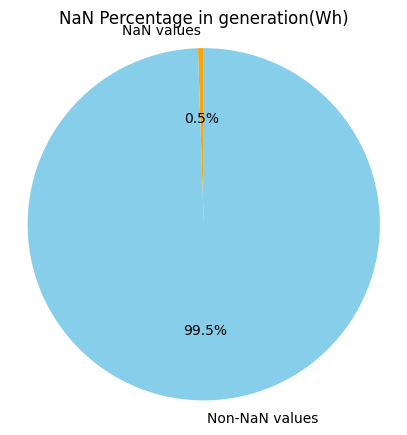

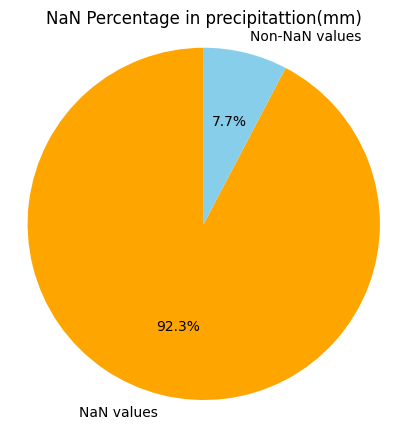

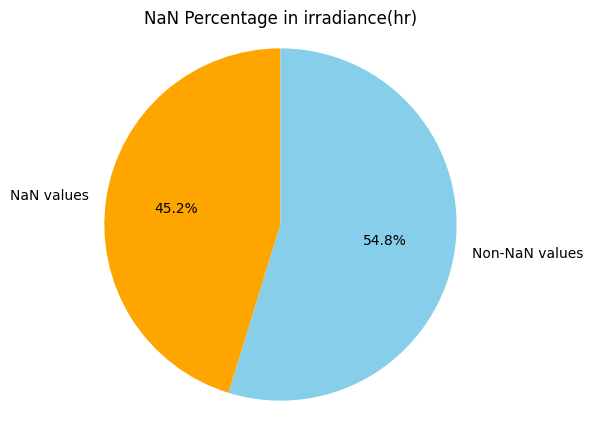

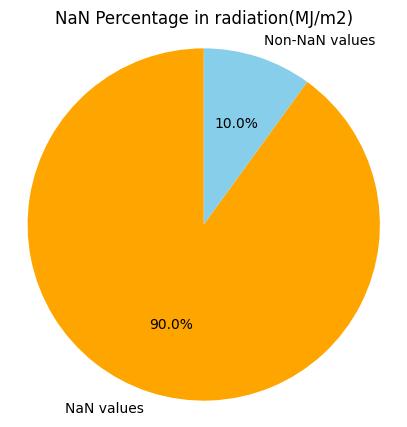

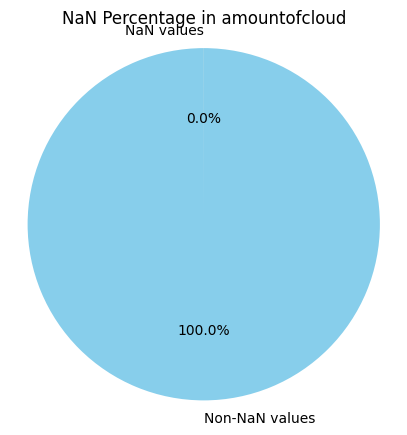

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame

# Count the number of NaN values per column
nan_counts = df_data.isna().sum()

# Filter only columns that contain NaN values
nan_columns = nan_counts[nan_counts > 0]

# Total number of rows
total_rows = len(df_data)

# Plot pie charts for each column containing NaNs
for col in nan_columns.index:
    # Calculate the percentage of NaN values and non-NaN values
    nan_percentage = (nan_columns[col] / total_rows) * 100
    non_nan_percentage = 100 - nan_percentage

    # Create labels and sizes
    labels = ['NaN values', 'Non-NaN values']
    sizes = [nan_percentage, non_nan_percentage]
    colors = ['orange', 'skyblue']

    # Create pie chart
    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f'NaN Percentage in {col}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


C:\Users\jd\AppData\Local\Temp\ipykernel_16452\2026304463.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_data["generation(Wh)"], palette='Set3', ax=axes[0, 0])
C:\Users\jd\AppData\Local\Temp\ipykernel_16452\2026304463.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_data["temperature(C)"], palette='Set3', ax=axes[0, 1])
C:\Users\jd\AppData\Local\Temp\ipykernel_16452\2026304463.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_data['precipitattion(mm)'], palette='Set3', ax=axes[0, 2])
C:\Users\jd\AppData\Loc

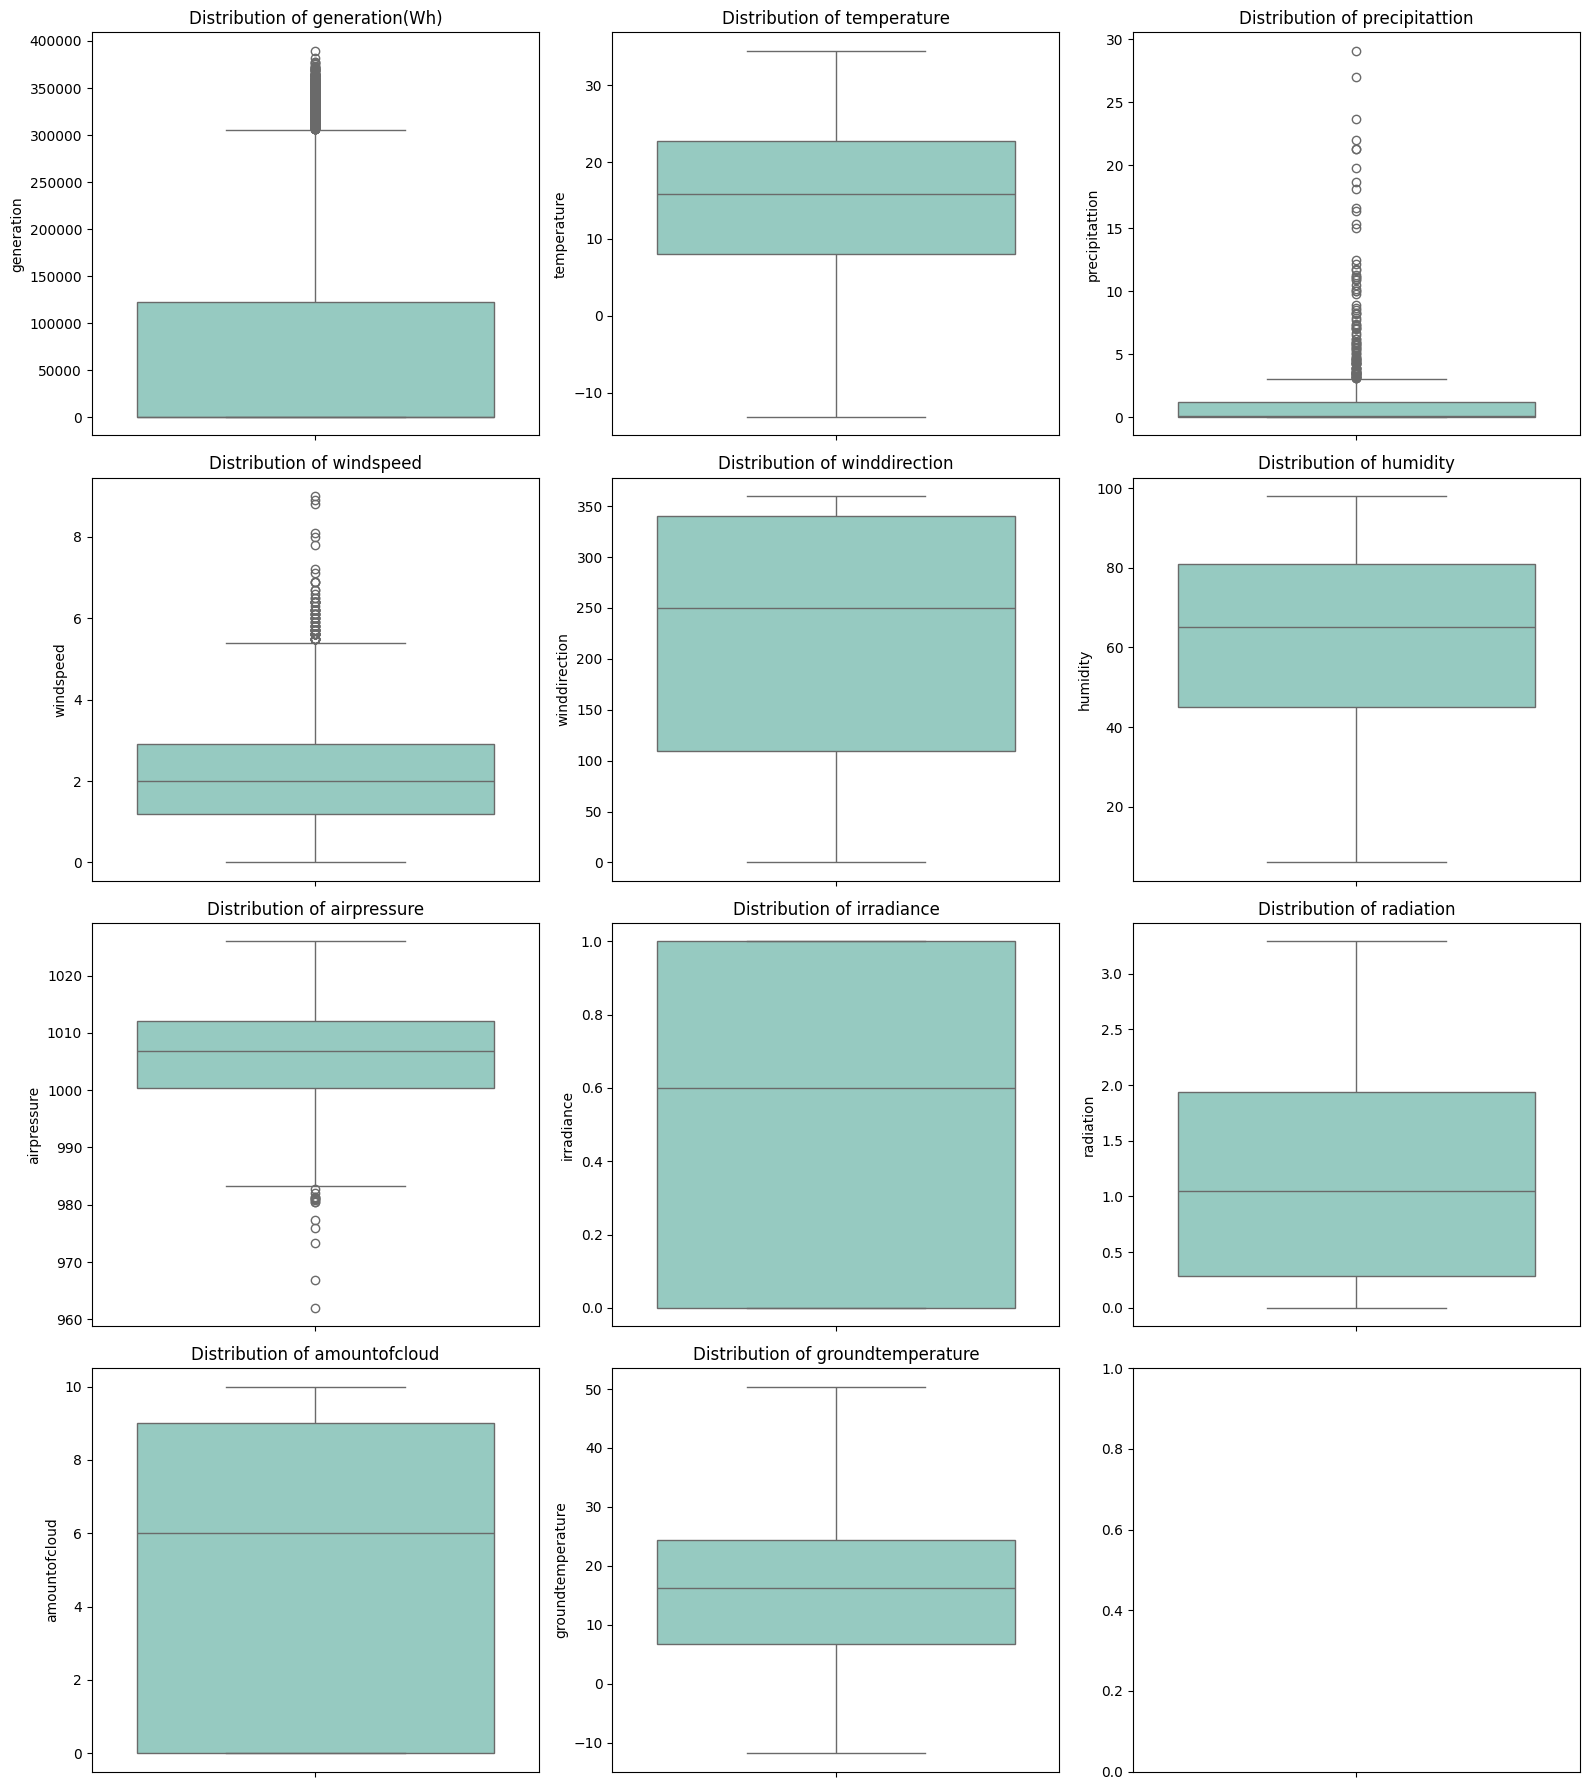

In [10]:
fig, axes = plt.subplots(4, 3, figsize=(16, 18), sharey=False, sharex=True)

# First plot Distributions of Readers Choice Votes
sns.boxplot(data=df_data["generation(Wh)"], palette='Set3', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of generation(Wh)')
axes[0, 0].set_ylabel('generation')

# Second plot Distribution of Average Ratings
sns.boxplot(data=df_data["temperature(C)"], palette='Set3', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of temperature')
axes[0, 1].set_ylabel('temperature')

# Third plot Distribution of Number of Ratings
sns.boxplot(data=df_data['precipitattion(mm)'], palette='Set3', ax=axes[0, 2])
axes[0, 2].set_title('Distribution of precipitattion')
axes[0, 2].set_ylabel('precipitattion')

# Fourth plot Distribution of Number of Reviews
sns.boxplot(data=df_data['windspeed(m/s)'], palette='Set3', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of windspeed')
axes[1, 0].set_ylabel('windspeed')

# Fifth plot Distribution of Number of Pages
sns.boxplot(data=df_data['winddirection(degree)'], palette='Set3', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of winddirection')
axes[1, 1].set_ylabel('winddirection')

# Sixth plot Distribution of Kindle Price
sns.boxplot(data=df_data['humidity(%)'], palette='Set3', ax=axes[1, 2])
axes[1, 2].set_title('Distribution of humidity')
axes[1, 2].set_ylabel('humidity')

# Sixth plot Distribution of Kindle Price
sns.boxplot(data=df_data['airpressure(hPa)'], palette='Set3', ax=axes[2, 0])
axes[2, 0].set_title('Distribution of airpressure')
axes[2, 0].set_ylabel('airpressure')

# Seventh plot Distribution of Kindle Price
sns.boxplot(data=df_data['irradiance(hr)'], palette='Set3', ax=axes[2, 1])
axes[2, 1].set_title('Distribution of irradiance')
axes[2, 1].set_ylabel('irradiance')

# Seventh plot Distribution of Kindle Price
sns.boxplot(data=df_data['radiation(MJ/m2)'], palette='Set3', ax=axes[2, 2])
axes[2, 2].set_title('Distribution of radiation')
axes[2, 2].set_ylabel('radiation')

# Seventh plot Distribution of Kindle Price
sns.boxplot(data=df_data['amountofcloud'], palette='Set3', ax=axes[3, 0])
axes[3, 0].set_title('Distribution of amountofcloud')
axes[3, 0].set_ylabel('amountofcloud')

# Seventh plot Distribution of Kindle Price
sns.boxplot(data=df_data['groundtemperature(C)'], palette='Set3', ax=axes[3, 1])
axes[3, 1].set_title('Distribution of groundtemperature')
axes[3, 1].set_ylabel('groundtemperature')

for ax in axes[2, :]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    
fig.tight_layout()
plt.show()

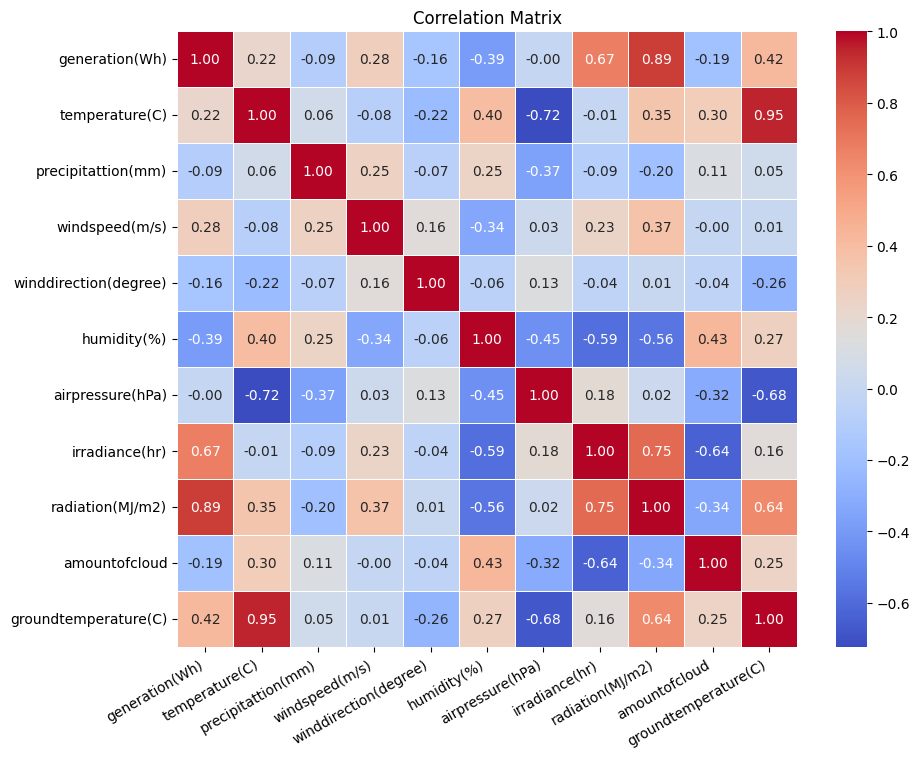

In [11]:
#Correlation Matrix

# Assign the columns
# columns_of_interest = ['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'DATE_TIME', 'PLANT_ID']

# Calculate the correlation matrix
correlation_matrix = df_data.drop('datetime', axis=1).copy().corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()


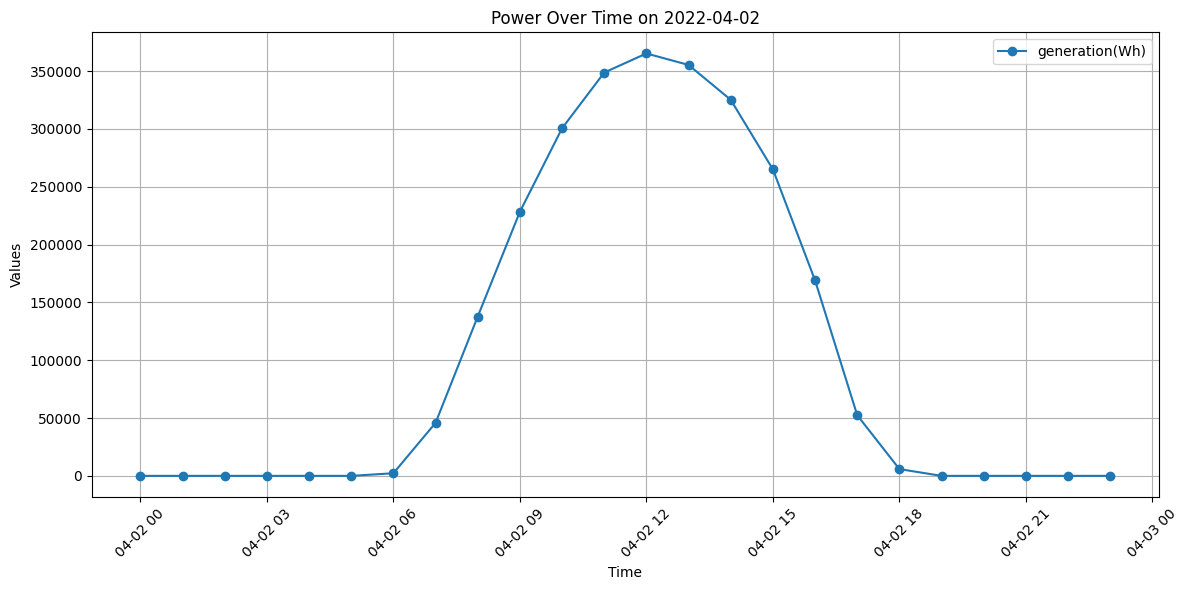

In [12]:
#Plotting a single day of generation
target_date = pd.to_datetime('2022-04-02')

df_filtered = df_data[(df_data['datetime'].dt.date == target_date.date())].copy()

df_filtered = df_filtered.sort_values(by='datetime', ascending=True)

# Set DATE_TIME as index for plotting
df_filtered.set_index('datetime', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

# Plot POWER
plt.plot(df_filtered.index, df_filtered['generation(Wh)'], label='generation(Wh)', marker='o')

# Customize the plot
plt.title('Power Over Time on 2022-04-02')
plt.xlabel('Time')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


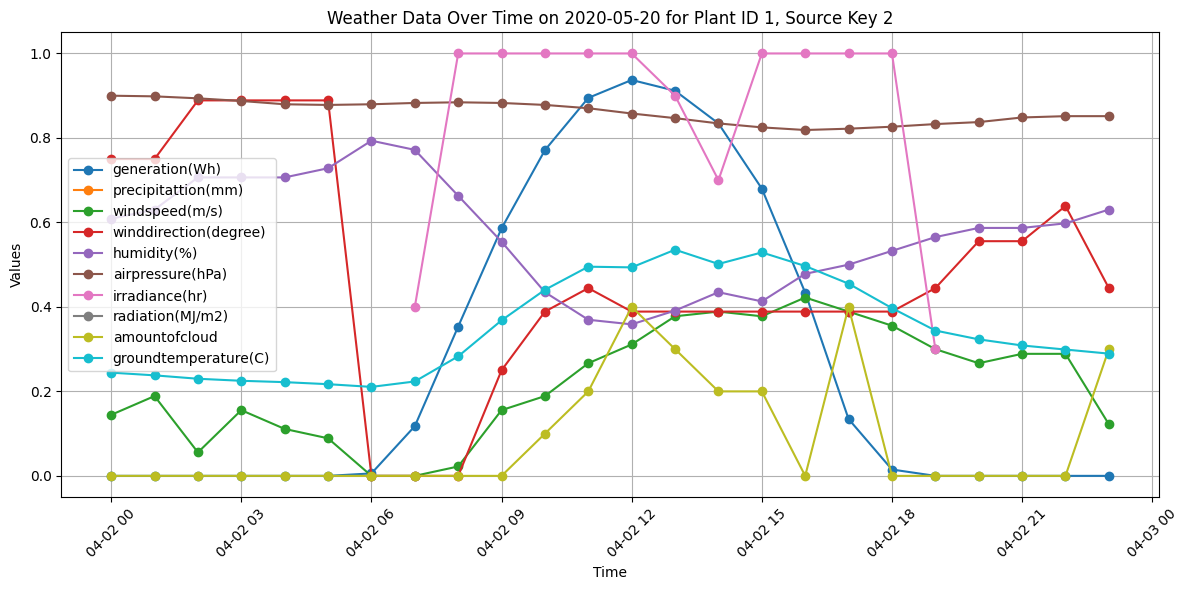

In [13]:
numerical_cols = ['generation(Wh)', 'temperature(C)', 'precipitattion(mm)', 'windspeed(m/s)', 'winddirection(degree)', 'humidity(%)',
                   'airpressure(hPa)', 'irradiance(hr)', 'radiation(MJ/m2)', 'amountofcloud',  'groundtemperature(C)']

df_normalized = df_data.copy()

df_normalized[numerical_cols] = (df_normalized[numerical_cols]-df_normalized[numerical_cols].min())/(df_normalized[numerical_cols].max()-df_normalized[numerical_cols].min())

df_normalized.sample(10)



#Plotting a single day for weather
target_date = pd.to_datetime('2022-04-02')

df_filtered = df_normalized[(df_normalized['datetime'].dt.date == target_date.date())].copy()

df_filtered = df_filtered.sort_values(by='datetime', ascending=True)

# Set DATE_TIME as index for plotting
df_filtered.set_index('datetime', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

# Plot POWER
plt.plot(df_filtered.index, df_filtered['generation(Wh)'], label='generation(Wh)', marker='o')

# Plot AC_POWER
plt.plot(df_filtered.index, df_filtered['precipitattion(mm)'], label='precipitattion(mm)', marker='o')

# Plot AMBIENT_TEMPERATURE
plt.plot(df_filtered.index, df_filtered['windspeed(m/s)'], label='windspeed(m/s)', marker='o')

# Plot MODULE_TEMPERATURE
plt.plot(df_filtered.index, df_filtered['winddirection(degree)'], label='winddirection(degree)', marker='o')

# Plot MODULE_TEMPERATURE
plt.plot(df_filtered.index, df_filtered['humidity(%)'], label='humidity(%)', marker='o')

# Plot MODULE_TEMPERATURE
plt.plot(df_filtered.index, df_filtered['airpressure(hPa)'], label='airpressure(hPa)', marker='o')

# Plot MODULE_TEMPERATURE
plt.plot(df_filtered.index, df_filtered['irradiance(hr)'], label='irradiance(hr)', marker='o')

# Plot MODULE_TEMPERATURE
plt.plot(df_filtered.index, df_filtered['radiation(MJ/m2)'], label='radiation(MJ/m2)', marker='o')

# Plot MODULE_TEMPERATURE
plt.plot(df_filtered.index, df_filtered['amountofcloud'], label='amountofcloud', marker='o')

# Plot MODULE_TEMPERATURE
plt.plot(df_filtered.index, df_filtered['groundtemperature(C)'], label='groundtemperature(C)', marker='o')

# # Plot TOTAL_YIELD
# plt.plot(df_filtered.index, df_filtered['TOTAL_YIELD'], label='TOTAL YIELD', marker='o')

# # Plot DAILY_YIELD
# plt.plot(df_filtered.index, df_filtered['DAILY_YIELD'], label='DAILY YIELD', marker='o')

# Customize the plot
plt.title('Weather Data Over Time on 2020-05-20 for Plant ID 1, Source Key 2')
plt.xlabel('Time')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

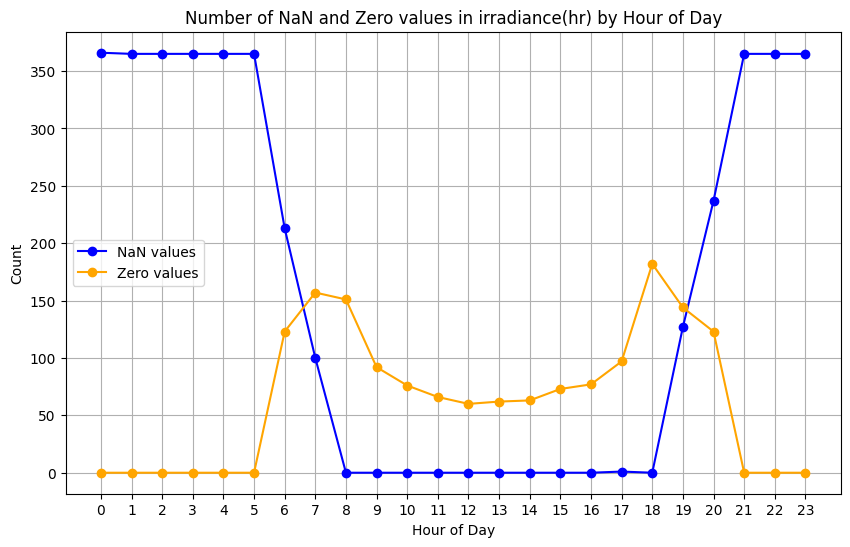

In [14]:
# Assuming the data is loaded into a DataFrame called df
# df = pd.read_csv('your_file.csv')  # Load your data
# Extract the hour from the datetime column
df_NaN_Count = df_data.copy()

df_NaN_Count['hour'] = df_NaN_Count['datetime'].dt.hour

# Count the number of NaN values in the 'irradiance(hr)' column for each hour
nan_counts_by_hour = df_NaN_Count.groupby('hour')['irradiance(hr)'].apply(lambda x: x.isna().sum())

# Count the number of times the value in 'irradiance(hr)' is 0 for each hour
zero_counts_by_hour = df_NaN_Count.groupby('hour')['irradiance(hr)'].apply(lambda x: (x == 0).sum())

# Plot the result
plt.figure(figsize=(10, 6))

# Plot NaN counts
plt.plot(nan_counts_by_hour.index, nan_counts_by_hour.values, marker='o', linestyle='-', color='b', label='NaN values')

# Plot zero counts
plt.plot(zero_counts_by_hour.index, zero_counts_by_hour.values, marker='o', linestyle='-', color='orange', label='Zero values')

# Add titles and labels
plt.title('Number of NaN and Zero values in irradiance(hr) by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(range(0, 24))  # Ensure all hours (0-23) are shown
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


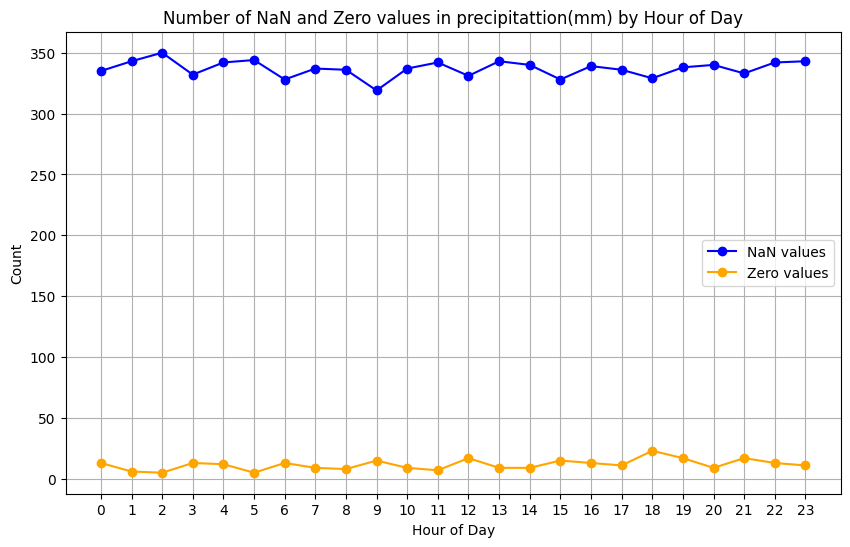

In [15]:
# Assuming the data is loaded into a DataFrame called df
# df = pd.read_csv('your_file.csv')  # Load your data
# Extract the hour from the datetime column
df_NaN_Count = df_data.copy()

df_NaN_Count['hour'] = df_NaN_Count['datetime'].dt.hour

# Count the number of NaN values in the 'irradiance(hr)' column for each hour
nan_counts_by_hour = df_NaN_Count.groupby('hour')['precipitattion(mm)'].apply(lambda x: x.isna().sum())

# Count the number of times the value in 'irradiance(hr)' is 0 for each hour
zero_counts_by_hour = df_NaN_Count.groupby('hour')['precipitattion(mm)'].apply(lambda x: (x == 0).sum())

# Plot the result
plt.figure(figsize=(10, 6))

# Plot NaN counts
plt.plot(nan_counts_by_hour.index, nan_counts_by_hour.values, marker='o', linestyle='-', color='b', label='NaN values')

# Plot zero counts
plt.plot(zero_counts_by_hour.index, zero_counts_by_hour.values, marker='o', linestyle='-', color='orange', label='Zero values')

# Add titles and labels
plt.title('Number of NaN and Zero values in precipitattion(mm) by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(range(0, 24))  # Ensure all hours (0-23) are shown
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

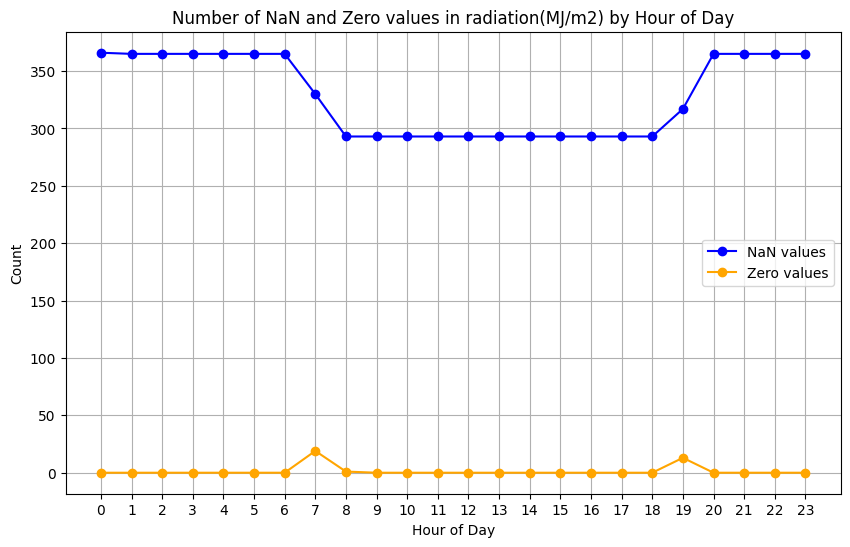

In [16]:
# Assuming the data is loaded into a DataFrame called df
# df = pd.read_csv('your_file.csv')  # Load your data
# Extract the hour from the datetime column
df_NaN_Count = df_data.copy()

df_NaN_Count['hour'] = df_NaN_Count['datetime'].dt.hour

# Count the number of NaN values in the 'irradiance(hr)' column for each hour
nan_counts_by_hour = df_NaN_Count.groupby('hour')['radiation(MJ/m2)'].apply(lambda x: x.isna().sum())

# Count the number of times the value in 'irradiance(hr)' is 0 for each hour
zero_counts_by_hour = df_NaN_Count.groupby('hour')['radiation(MJ/m2)'].apply(lambda x: (x == 0).sum())

# Plot the result
plt.figure(figsize=(10, 6))

# Plot NaN counts
plt.plot(nan_counts_by_hour.index, nan_counts_by_hour.values, marker='o', linestyle='-', color='b', label='NaN values')

# Plot zero counts
plt.plot(zero_counts_by_hour.index, zero_counts_by_hour.values, marker='o', linestyle='-', color='orange', label='Zero values')

# Add titles and labels
plt.title('Number of NaN and Zero values in radiation(MJ/m2) by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(range(0, 24))  # Ensure all hours (0-23) are shown
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

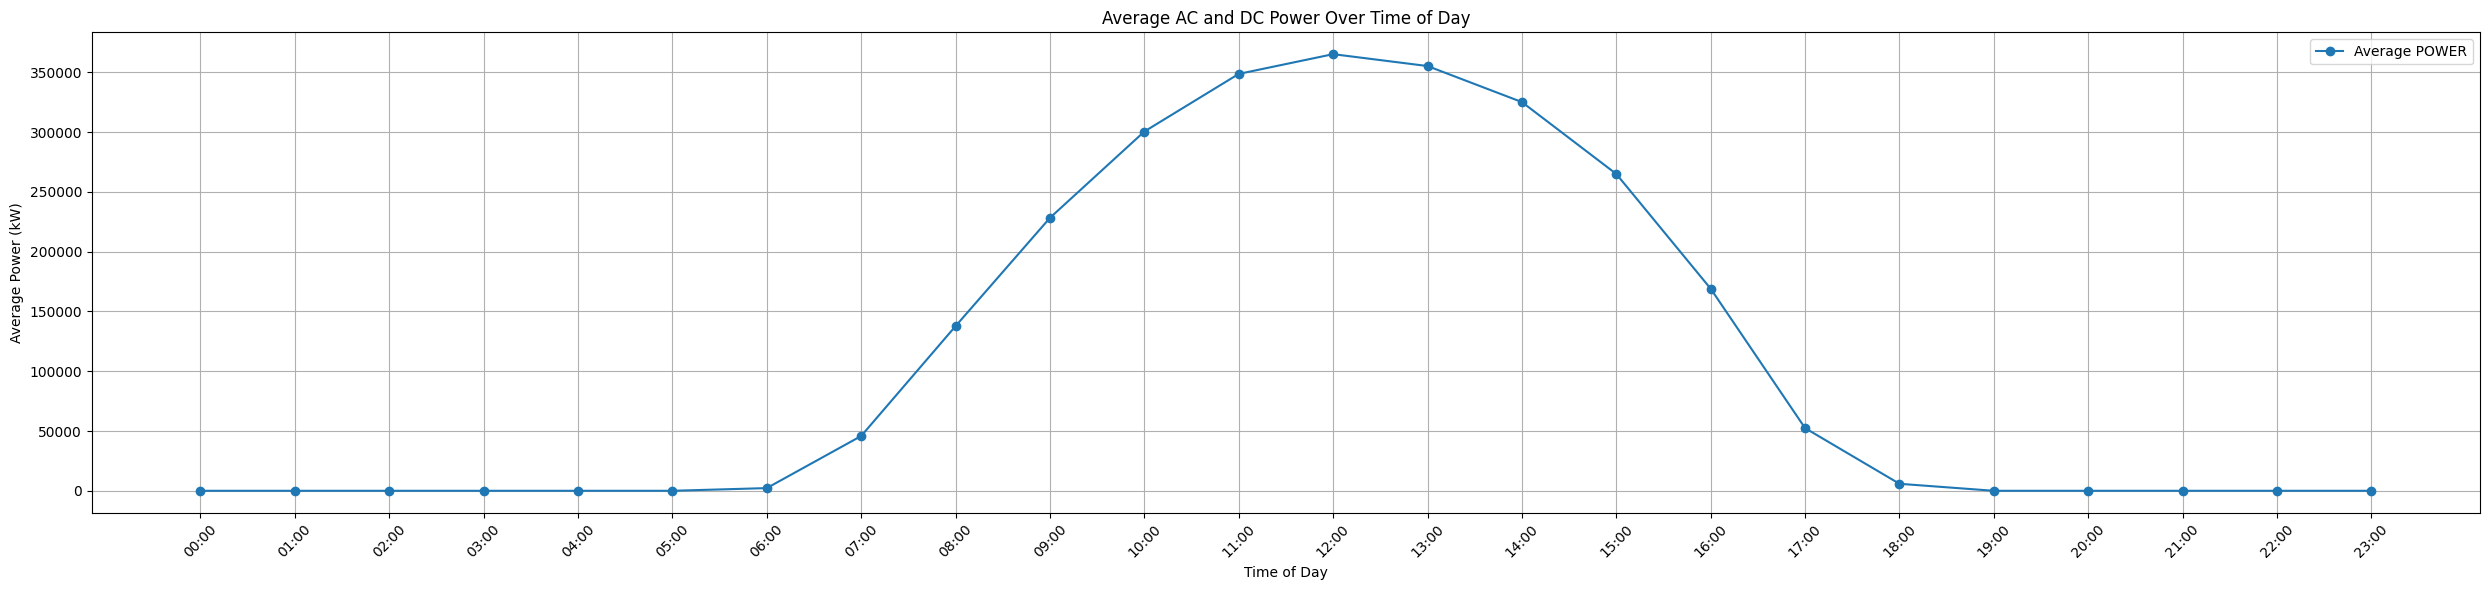

In [17]:
#Plotting a single day of generation
target_date = pd.to_datetime('2022-04-02')

df_filtered = df_data[(df_data['datetime'].dt.date == target_date.date())].copy()

df_filtered = df_filtered.sort_values(by='datetime', ascending=True)

# Set DATE_TIME as index for plotting
df_filtered.set_index('datetime', inplace=True)



#AVG Powers per time of time
df_plot_avg = df_filtered.copy()
avg_power = df_plot_avg.groupby('datetime')[['generation(Wh)']].mean().reset_index()

# Plotting
plt.figure(figsize=(25, 6))
plt.plot(avg_power['datetime'], avg_power['generation(Wh)'], label='Average POWER', marker='o')

# Set every nth x-tick label (e.g., every 2nd label)
plt.xticks(avg_power['datetime'])  # Set x-ticks to match TIME_OF_DAY
n = 5
xticks = plt.xticks()[0]  # Get current x-ticks
plt.xticks(avg_power['datetime'], avg_power['datetime'].dt.strftime('%H:%M'), rotation=45)

# Customize the plot
plt.title('Average AC and DC Power Over Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Power (kW)')
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\jd\AppData\Local\Temp\ipykernel_16452\3983674068.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  avg_power['datetime'] = pd.to_datetime(avg_power['time_of_day'].astype(str))  # Convert to datetime


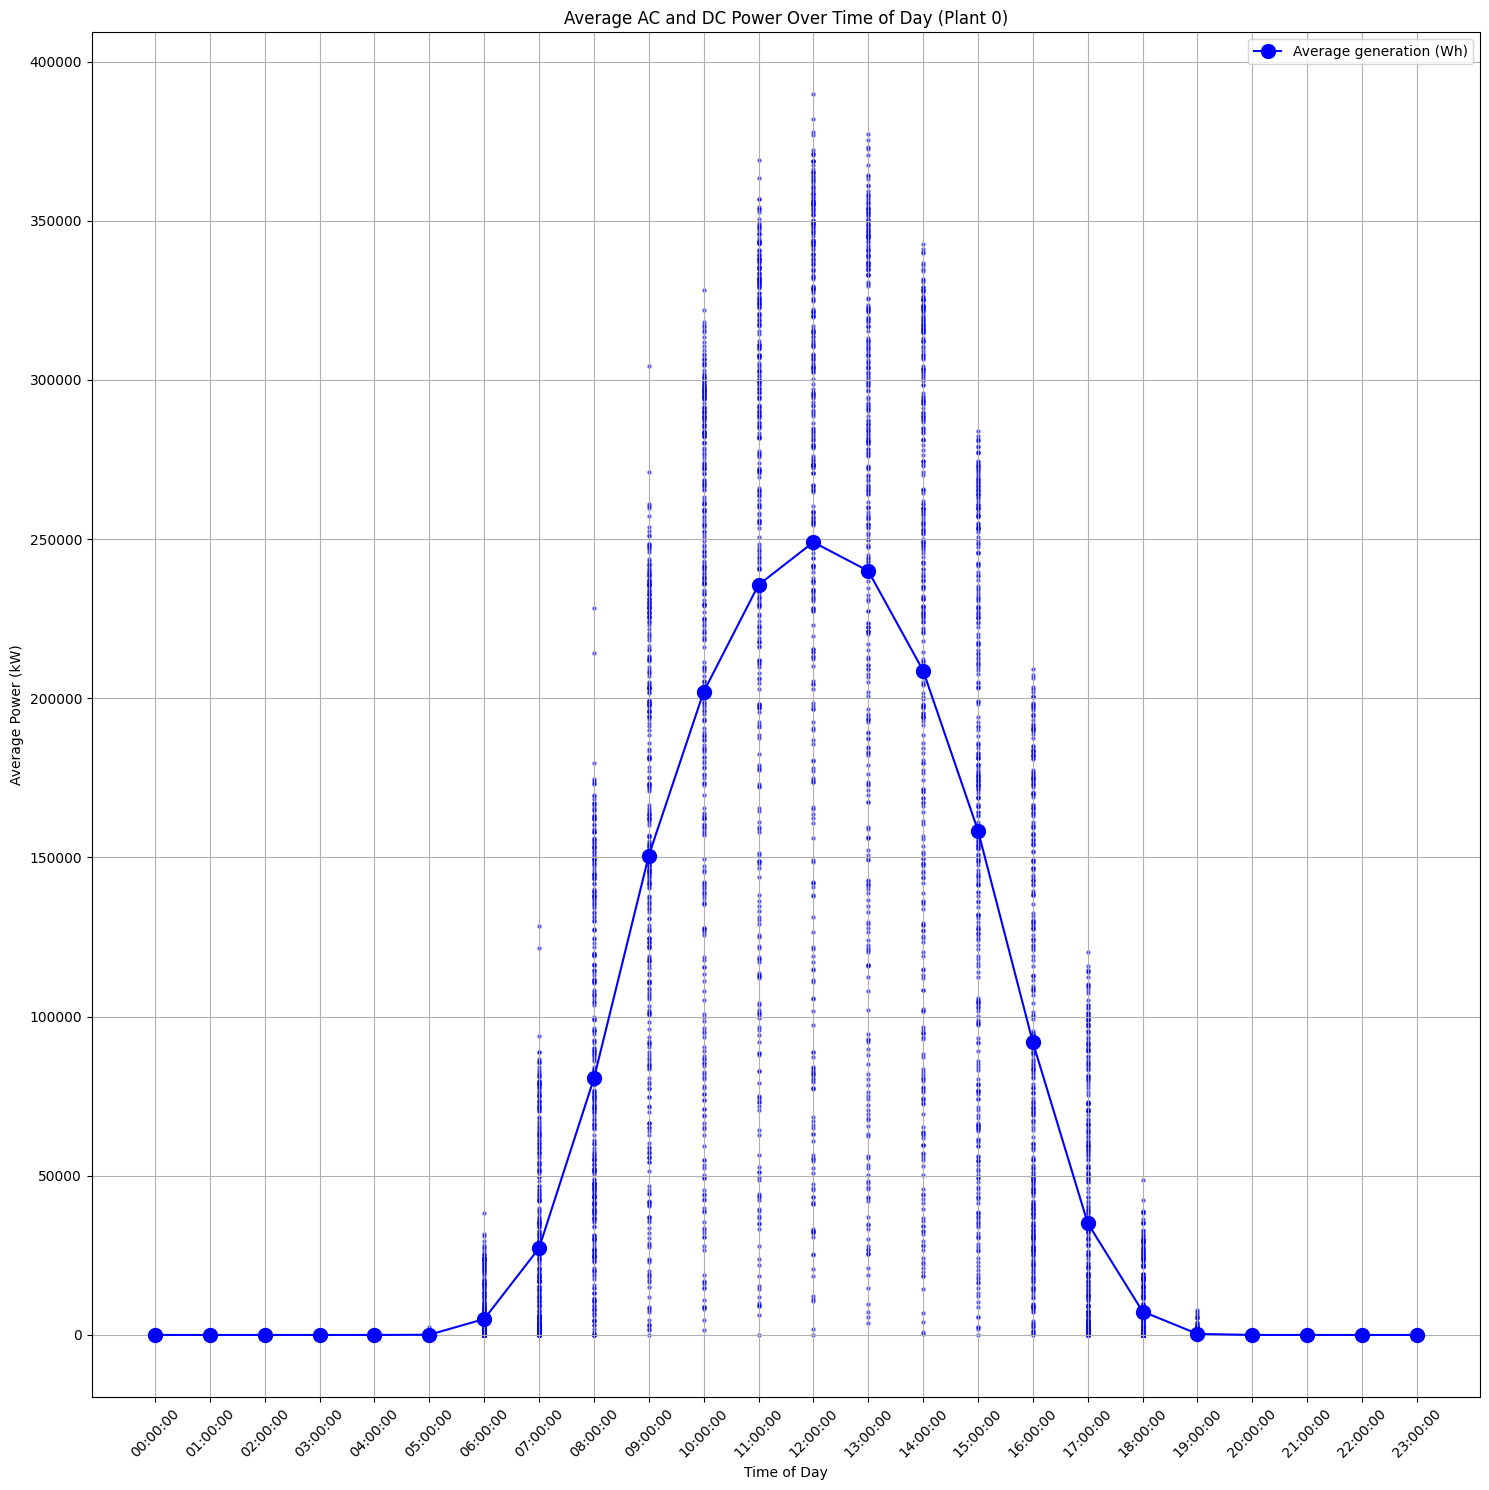

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_data has a 'datetime' column and 'generation(Wh)' column
df_data['datetime'] = pd.to_datetime(df_data['datetime'])  # Ensure datetime is in correct format

# Extract time of day for grouping
df_data['time_of_day'] = df_data['datetime'].dt.time  # Create a time of day column

# Calculate average generation power per time of day
avg_power = df_data.groupby('time_of_day')[['generation(Wh)']].mean().reset_index()

# Convert time_of_day to datetime for plotting
avg_power['datetime'] = pd.to_datetime(avg_power['time_of_day'].astype(str))  # Convert to datetime

# Plotting
plt.figure(figsize=(15, 15))

# Plot the average generation power
plt.plot(avg_power['datetime'], avg_power['generation(Wh)'], label='Average generation (Wh)', marker='o', markersize=10, color='blue')

# Plot individual data points
for time in df_data['time_of_day'].unique():
    subset = df_data[df_data['time_of_day'] == time]
    # Convert time to datetime for plotting
    subset_datetime = pd.to_datetime(subset['time_of_day'].astype(str))
    plt.scatter(subset_datetime, subset['generation(Wh)'], color='blue', alpha=0.5, s=5, zorder=-1, marker='o')

# Customize x-ticks to show time of day correctly
plt.xticks(avg_power['datetime'], avg_power['time_of_day'], rotation=45)  # Use original time_of_day for labels

# Customize the plot
plt.title('Average AC and DC Power Over Time of Day (Plant 0)')
plt.xlabel('Time of Day')
plt.ylabel('Average Power (kW)')
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


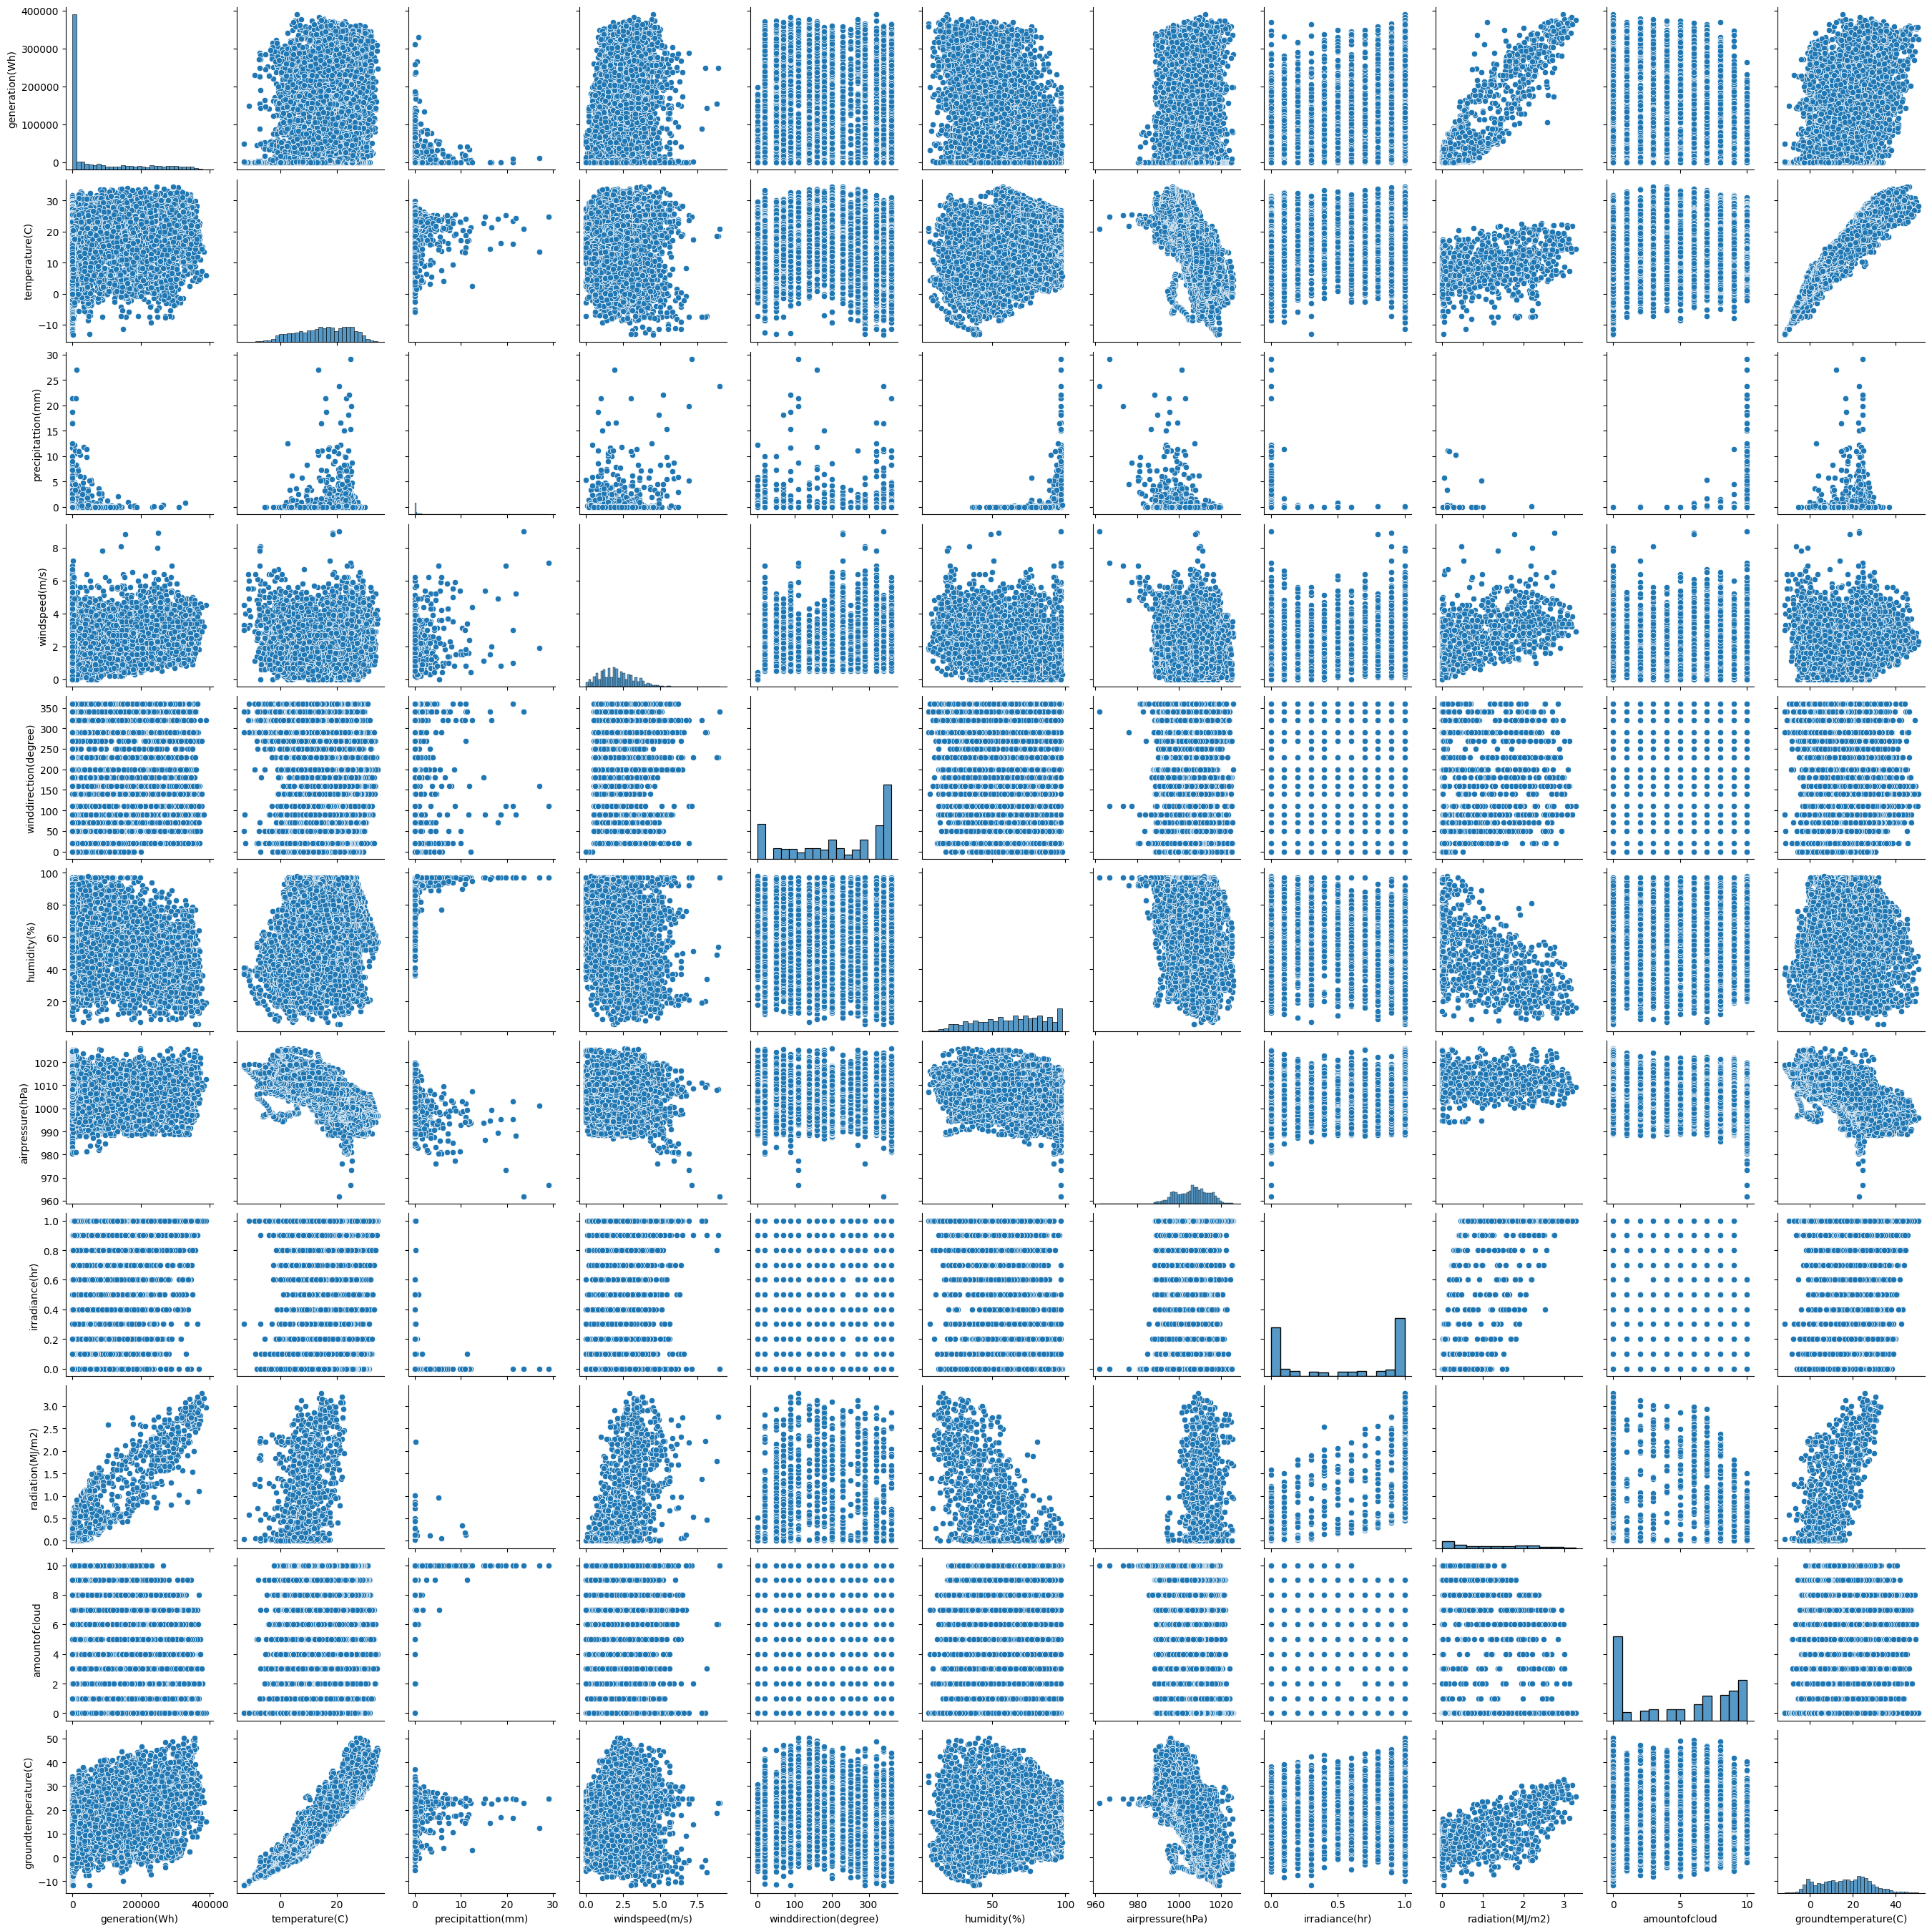

In [19]:
# Selecting numerical columns for the pairplot
numerical_cols = ['generation(Wh)', 'temperature(C)', 'precipitattion(mm)', 'windspeed(m/s)', 'winddirection(degree)', 'humidity(%)',
                   'airpressure(hPa)', 'irradiance(hr)', 'radiation(MJ/m2)', 'amountofcloud',  'groundtemperature(C)']

# Create pairplot
sns.pairplot(df_data[numerical_cols])

# Show the plot
plt.show()


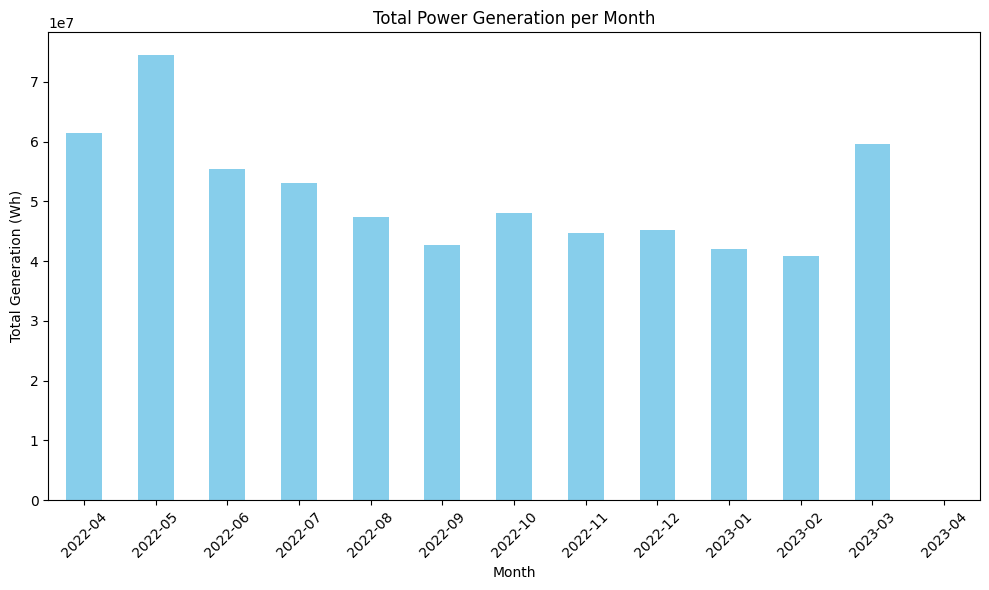

In [20]:

# Extract year and month
df_monthly = df_data 
df_monthly['year_month'] = df_monthly['datetime'].dt.to_period('M')

# Group by 'year_month' and sum the generation
monthly_generation = df_monthly.groupby('year_month')['generation(Wh)'].sum()

# Plotting
plt.figure(figsize=(10, 6))
monthly_generation.plot(kind='bar', color='skyblue')
plt.title('Total Power Generation per Month')
plt.xlabel('Month')
plt.ylabel('Total Generation (Wh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Multi-Feature LSTM

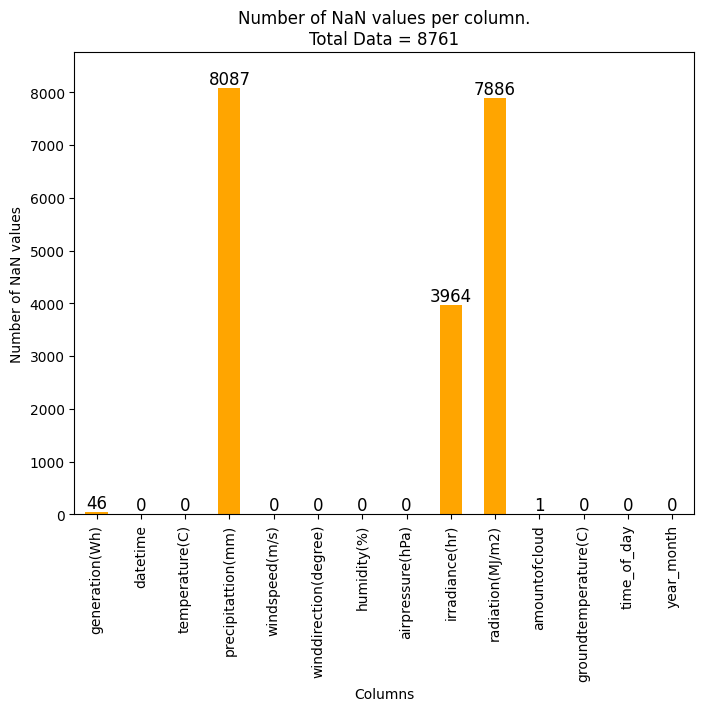

In [21]:
# Check for missing data

nan_counts = df_data.isna().sum()

ax = nan_counts.plot(kind='bar', figsize=(8, 6), color='orange')
# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Number of NaN values')
plt.title(f'Number of NaN values per column.\nTotal Data = {len(df_data)}')

# Add value labels above each bar
for i, value in enumerate(nan_counts):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)


plt.ylim(0, len(df_data))

# Show plot
plt.show()

In [22]:
df_cleaned = df_data.drop(['precipitattion(mm)','radiation(MJ/m2)', 'time_of_day'], axis=1)


In [23]:
df_cleaned.head(25)

generation(Wh)            datetime  temperature(C)  windspeed(m/s)  \
0              0.0 2022-04-01 00:00:00             7.7             3.1   
1              0.0 2022-04-01 01:00:00             7.1             2.8   
2              0.0 2022-04-01 02:00:00             6.7             2.7   
3              0.0 2022-04-01 03:00:00             6.7             3.1   
4              0.0 2022-04-01 04:00:00             6.6             3.2   
5              0.0 2022-04-01 05:00:00             6.6             3.5   
6           1008.0 2022-04-01 06:00:00             6.1             2.6   
7          25152.0 2022-04-01 07:00:00             6.9             2.7   
8         107856.0 2022-04-01 08:00:00             8.3             2.8   
9         195888.0 2022-04-01 09:00:00             9.5             3.4   
10        238128.0 2022-04-01 10:00:00            10.6             3.4   
11        356832.0 2022-04-01 11:00:00            11.1             3.8   
12        343008.0 2022-04-01 12:00:00            10.6             3.1   
13        373104.0 2022-04-01 13:00:00            11.0             4.6   
14        329088.0 2022-04-01 14:00:00            11.2             4.3   
15        271584.0 2022-04-01 15:00:00            10.7             4.0   
16        141360.0 2022-04-01 16:00:00            10.6             4.4   
17         59280.0 2022-04-01 17:00:00             9.6             3.7   
18          6384.0 2022-04-01 18:00:00             9.1             2.5   
19             0.0 2022-04-01 19:00:00             8.6             1.4   
20             0.0 2022-04-01 20:00:00             7.8             0.8   
21             0.0 2022-04-01 21:00:00             7.1             0.7   
22             0.0 2022-04-01 22:00:00             6.6             0.8   
23             0.0 2022-04-01 23:00:00             6.1             1.8   
24             0.0 2022-04-02 00:00:00             5.4             1.3   

    winddirection(degree)  humidity(%)  airpressure(hPa)  irradiance(hr)  \
0                     340         61.0            1017.3             NaN   
1                     340         67.0            1017.6             NaN   
2                     320         70.0            1017.4             NaN   
3                     340         73.0            1017.2             NaN   
4                     340         71.0            1017.3             NaN   
5                     340         66.0            1017.5             NaN   
6                     340         68.0            1018.0             NaN   
7                     340         58.0            1019.0             0.2   
8                     360         51.0            1019.5             1.0   
9                      20         47.0            1020.0             1.0   
10                     20         39.0            1020.3             1.0   
11                     70         41.0            1020.3             1.0   
12                     50         39.0            1020.0             1.0   
13                     90         37.0            1019.3             1.0   
14                     70         37.0            1019.0             1.0   
15                     90         38.0            1018.6             1.0   
16                     90         39.0            1018.4             1.0   
17                     70         40.0            1018.4             1.0   
18                     50         44.0            1018.6             0.5   
19                     70         45.0            1018.7             0.0   
20                    360         50.0            1019.2             NaN   
21                    340         54.0            1019.7             NaN   
22                    320         56.0            1019.5             NaN   
23                    290         59.0            1019.5             NaN   
24                    270         62.0            1019.6             NaN   

    amountofcloud  groundtemperature(C) year_month  
0             9.0                   6.1    2022-0

In [24]:
df_cleaned['irradiance(hr)'] = df_cleaned['irradiance(hr)'].fillna(0)
df_cleaned.head(25)

generation(Wh)            datetime  temperature(C)  windspeed(m/s)  \
0              0.0 2022-04-01 00:00:00             7.7             3.1   
1              0.0 2022-04-01 01:00:00             7.1             2.8   
2              0.0 2022-04-01 02:00:00             6.7             2.7   
3              0.0 2022-04-01 03:00:00             6.7             3.1   
4              0.0 2022-04-01 04:00:00             6.6             3.2   
5              0.0 2022-04-01 05:00:00             6.6             3.5   
6           1008.0 2022-04-01 06:00:00             6.1             2.6   
7          25152.0 2022-04-01 07:00:00             6.9             2.7   
8         107856.0 2022-04-01 08:00:00             8.3             2.8   
9         195888.0 2022-04-01 09:00:00             9.5             3.4   
10        238128.0 2022-04-01 10:00:00            10.6             3.4   
11        356832.0 2022-04-01 11:00:00            11.1             3.8   
12        343008.0 2022-04-01 12:00:00            10.6             3.1   
13        373104.0 2022-04-01 13:00:00            11.0             4.6   
14        329088.0 2022-04-01 14:00:00            11.2             4.3   
15        271584.0 2022-04-01 15:00:00            10.7             4.0   
16        141360.0 2022-04-01 16:00:00            10.6             4.4   
17         59280.0 2022-04-01 17:00:00             9.6             3.7   
18          6384.0 2022-04-01 18:00:00             9.1             2.5   
19             0.0 2022-04-01 19:00:00             8.6             1.4   
20             0.0 2022-04-01 20:00:00             7.8             0.8   
21             0.0 2022-04-01 21:00:00             7.1             0.7   
22             0.0 2022-04-01 22:00:00             6.6             0.8   
23             0.0 2022-04-01 23:00:00             6.1             1.8   
24             0.0 2022-04-02 00:00:00             5.4             1.3   

    winddirection(degree)  humidity(%)  airpressure(hPa)  irradiance(hr)  \
0                     340         61.0            1017.3             0.0   
1                     340         67.0            1017.6             0.0   
2                     320         70.0            1017.4             0.0   
3                     340         73.0            1017.2             0.0   
4                     340         71.0            1017.3             0.0   
5                     340         66.0            1017.5             0.0   
6                     340         68.0            1018.0             0.0   
7                     340         58.0            1019.0             0.2   
8                     360         51.0            1019.5             1.0   
9                      20         47.0            1020.0             1.0   
10                     20         39.0            1020.3             1.0   
11                     70         41.0            1020.3             1.0   
12                     50         39.0            1020.0             1.0   
13                     90         37.0            1019.3             1.0   
14                     70         37.0            1019.0             1.0   
15                     90         38.0            1018.6             1.0   
16                     90         39.0            1018.4             1.0   
17                     70         40.0            1018.4             1.0   
18                     50         44.0            1018.6             0.5   
19                     70         45.0            1018.7             0.0   
20                    360         50.0            1019.2             0.0   
21                    340         54.0            1019.7             0.0   
22                    320         56.0            1019.5             0.0   
23                    290         59.0            1019.5             0.0   
24                    270         62.0            1019.6             0.0   

    amountofcloud  groundtemperature(C) year_month  
0             9.0                   6.1    2022-0

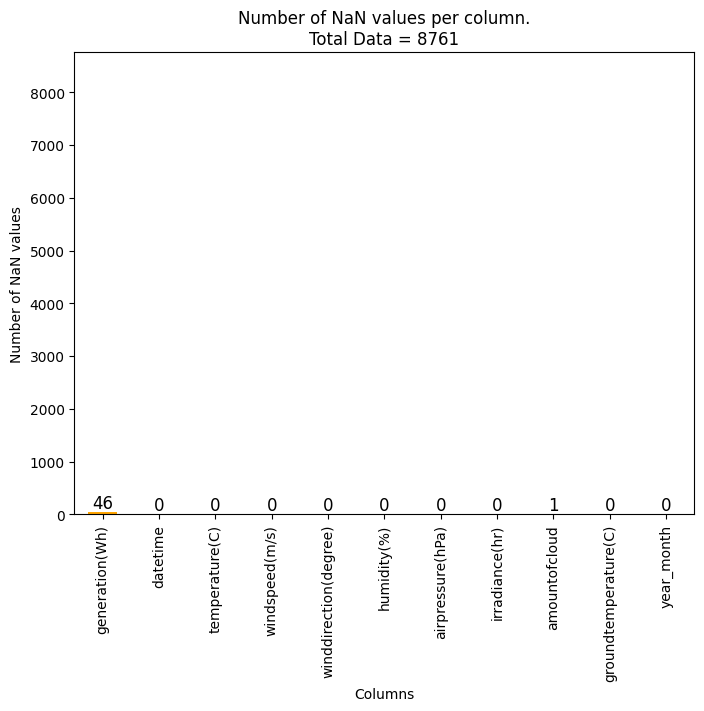

In [25]:
# Check for missing data

nan_counts = df_cleaned.isna().sum()

ax = nan_counts.plot(kind='bar', figsize=(8, 6), color='orange')
# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Number of NaN values')
plt.title(f'Number of NaN values per column.\nTotal Data = {len(df_cleaned)}')

# Add value labels above each bar
for i, value in enumerate(nan_counts):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)


plt.ylim(0, len(df_cleaned))

# Show plot
plt.show()


In [26]:
# Identify the rows with NaN values for each column
nan_rows = {col: df_cleaned[df_cleaned[col].isna()].index.tolist() for col in df_cleaned.columns}

print(nan_rows)

{'generation(Wh)': [2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2509, 2510, 2511, 2512, 3786, 3787, 3788, 3789, 3790, 3791, 3792, 3793, 3794, 3795, 3796, 3797, 3798, 3799, 3800, 3801], 'datetime': [], 'temperature(C)': [], 'windspeed(m/s)': [], 'winddirection(degree)': [], 'humidity(%)': [], 'airpressure(hPa)': [], 'irradiance(hr)': [], 'amountofcloud': [92], 'groundtemperature(C)': [], 'year_month': []}


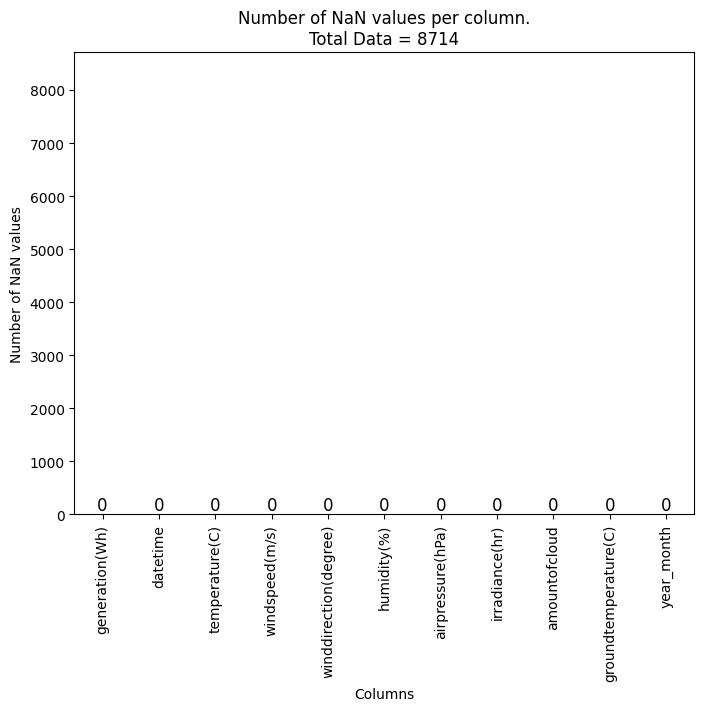

In [27]:
df_cleaned = df_cleaned.dropna()
# Check for missing data

nan_counts = df_cleaned.isna().sum()

ax = nan_counts.plot(kind='bar', figsize=(8, 6), color='orange')
# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Number of NaN values')
plt.title(f'Number of NaN values per column.\nTotal Data = {len(df_cleaned)}')

# Add value labels above each bar
for i, value in enumerate(nan_counts):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)


plt.ylim(0, len(df_cleaned))

# Show plot
plt.show()


In [28]:
numerical_cols = ['generation(Wh)', 'temperature(C)', 'windspeed(m/s)', 'winddirection(degree)', 'humidity(%)',
                   'airpressure(hPa)', 'irradiance(hr)', 'amountofcloud',  'groundtemperature(C)']

# Normalize
print("Pre Normalization")
for col in df_cleaned[numerical_cols]:
    print(col)
    print(f"min  {df_cleaned[col].min()}")
    print(f"max {df_cleaned[col].max()}")
    print(f"mean {df_cleaned[col].mean()}")
    print(f"std {df_cleaned[col].std()}")
    print(f"median {df_cleaned[col].median()}")
    print("-------------------")
df_normalized = df_cleaned.copy()

df_normalized[numerical_cols] = (df_normalized[numerical_cols]-df_normalized[numerical_cols].min())/(df_normalized[numerical_cols].max()-df_normalized[numerical_cols].min())

df_normalized.sample(10)

print("Post Normalization")
for col in df_normalized[numerical_cols]:
    print(col)
    print(f"min  {df_normalized[col].min()}")
    print(f"max {df_normalized[col].max()}")
    print(f"mean {df_normalized[col].mean()}")
    print(f"std {df_normalized[col].std()}")
    print(f"median {df_normalized[col].median()}")
    print("-------------------")



Pre Normalization
generation(Wh)
min  0.0
max 389712.0
mean 70531.60087215975
std 106752.48207452145
median 144.0
-------------------
temperature(C)
min  -13.2
max 34.5
mean 15.016307092035804
std 9.231806286111265
median 15.8
-------------------
windspeed(m/s)
min  0.0
max 8.9
mean 2.105818223548313
std 1.1704231694171823
median 2.0
-------------------
winddirection(degree)
min  0
max 360
mean 220.51641037411062
std 123.0793339896386
median 270.0
-------------------
humidity(%)
min  6.0
max 98.0
mean 62.580319026853346
std 22.781673251605163
median 65.0
-------------------
airpressure(hPa)
min  980.4
max 1026.0
mean 1006.464952949277
std 7.56464345956531
median 1006.9
-------------------
irradiance(hr)
min  0.0
max 1.0
mean 0.2922194170300666
std 0.4237325029692773
median 0.0
-------------------
amountofcloud
min  0.0
max 10.0
mean 4.783566674317191
std 3.919712528249482
median 5.0
-------------------
groundtemperature(C)
min  -11.8
max 50.4
mean 15.771482671563
std 11.471858908657323

In [29]:
df_pred = df_normalized.copy()
# Step 2: Set 'DATE_TIME' as the index
df_pred.set_index('datetime', inplace=True)
df_pred.index = pd.to_datetime(df_pred.index)


In [30]:
print(df_pred.shape)
df_pred.head(10)

(8714, 10)


generation(Wh)  temperature(C)  windspeed(m/s)  \
datetime                                                              
2022-04-01 00:00:00        0.000000        0.438155        0.348315   
2022-04-01 01:00:00        0.000000        0.425577        0.314607   
2022-04-01 02:00:00        0.000000        0.417191        0.303371   
2022-04-01 03:00:00        0.000000        0.417191        0.348315   
2022-04-01 04:00:00        0.000000        0.415094        0.359551   
2022-04-01 05:00:00        0.000000        0.415094        0.393258   
2022-04-01 06:00:00        0.002587        0.404612        0.292135   
2022-04-01 07:00:00        0.064540        0.421384        0.303371   
2022-04-01 08:00:00        0.276758        0.450734        0.314607   
2022-04-01 09:00:00        0.502648        0.475891        0.382022   

                     winddirection(degree)  humidity(%)  airpressure(hPa)  \
datetime                                                                    
2022-04-01 00:00:00               0.944444     0.597826          0.809211   
2022-04-01 01:00:00               0.944444     0.663043          0.815789   
2022-04-01 02:00:00               0.888889     0.695652          0.811404   
2022-04-01 03:00:00               0.944444     0.728261          0.807018   
2022-04-01 04:00:00               0.944444     0.706522          0.809211   
2022-04-01 05:00:00               0.944444     0.652174          0.813596   
2022-04-01 06:00:00               0.944444     0.673913          0.824561   
2022-04-01 07:00:00               0.944444     0.565217          0.846491   
2022-04-01 08:00:00               1.000000     0.489130          0.857456   
2022-04-01 09:00:00               0.055556     0.445652          0.868421   

                     irradiance(hr)  amountofcloud  groundtemperature(C)  \
datetime                                                                   
2022-04-01 00:00:00             0.0            0.9              0.287781   
2022-04-01 01:00:00             0.0            1.0              0.286174   
2022-04-01 02:00:00             0.0            1.0              0.282958   
2022-04-01 03:00:00             0.0            0.9              0.274920   
2022-04-01 04:00:00             0.0            0.1              0.260450   
2022-04-01 05:00:00             0.0            0.1              0.252412   
2022-04-01 06:00:00             0.0            0.0              0.245981   
2022-04-01 07:00:00             0.2            0.0              0.247588   
2022-04-01 08:00:00             1.0            0.3              0.292605   
2022-04-01 09:00:00             1.0            0.4              0.331190   

                    year_month  
datetime                        
2022-04-01 00:00:00    2022-04  
2022-04-01 01:00:00    2022-04  
2022-04-01 02:00:00    2022-04  
2022-04-01 03:00:00    2022-04  
2022-04-01 04:00:00    2022-04  
2022-04-01 05:00:00    2022-04  
2022-04-01 06:00:00    2022-04  
2022-04-01 07:00:00    2022-04  
2022-04-01 08:00:00    2022-04  
2022-04-01 09:00:00    2022-04

In [31]:
# df_pred['time_of_day'] = df_pred['time_of_day'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)


In [32]:
# Making a function to execute above idea

def df_to_X_y(df, window_size=5):  # 5 here means we are taking the last 5 values
    df_as_np = df.to_numpy() #converting the dataframe to numpy arrays
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size, 0]
        y.append(label)
    return np.array(X), np.array(y)

In [33]:
WINDOW_SIZE = 24
X, y = df_to_X_y(df_pred, WINDOW_SIZE)
X.shape, y.shape

((8690, 24, 1, 10), (8690,))

In [34]:
df_pred.to_csv('./data.csv')

In [35]:
X = np.squeeze(X)
y = np.squeeze(y)
print(X.shape, y.shape)

(8690, 24, 10) (8690,)


In [36]:
y
df_temp = pd.DataFrame(y, columns=["y"])
print(df_temp.shape)  
df_temp.head(10)  # Display the first few rows


(8690, 1)


y
0  0.000000
1  0.000000
2  0.000000
3  0.000000
4  0.000000
5  0.000000
6  0.005789
7  0.117625
8  0.353492
9  0.585910

In [37]:
df_temp.tail(10)

y
8680  0.688878
8681  0.453627
8682  0.173790
8683  0.014041
8684  0.000000
8685  0.000000
8686  0.000000
8687  0.000000
8688  0.000000
8689  0.000000

In [38]:
num_featrues = 9
temp = X.reshape(-1, num_featrues)  # Reshape to (3177*5, num_features)

# Create a DataFrame
df_temp = pd.DataFrame(temp, columns=[f'Column_{i+1}' for i in range(num_featrues)])

print(df_temp.shape)  # Should print (15885, num_features) if you reshaped (3177*5, num_features)
df_temp.head(10)  # Display the first few rows


ValueError: cannot reshape array of size 2085600 into shape (9)

In [38]:
df_temp.tail(10) 



Column_1  Column_2  Column_3  Column_4  Column_5  Column_6  Column_7  \
208550  0.844562  0.723270  0.438202  0.250000  0.108696  0.576754       1.0   
208551  0.688878  0.693920  0.640449  0.250000  0.141304  0.572368       1.0   
208552  0.453627  0.691824  0.314607  0.250000  0.163043  0.570175       1.0   
208553  0.173790  0.668763  0.438202  0.250000  0.228261  0.567982       1.0   
208554  0.014041  0.645702  0.224719  0.250000  0.315217  0.574561       1.0   
208555  0.000000  0.603774  0.303371  0.250000  0.445652  0.587719       0.2   
208556  0.000000  0.582809  0.224719  0.055556  0.500000  0.600877       0.0   
208557  0.000000  0.559748  0.146067  0.944444  0.521739  0.607456       0.0   
208558  0.000000  0.545073  0.191011  1.000000  0.565217  0.607456       0.0   
208559  0.000000  0.517820  0.056180  0.888889  0.641304  0.607456       0.0   

        Column_8  Column_9  
208550       0.0  0.672026  
208551       0.0  0.636656  
208552       0.0  0.602894  
208553       0.0  0.540193  
208554       0.0  0.466238  
208555       0.0  0.406752  
208556       0.0  0.377814  
208557       0.0  0.360129  
208558       0.0  0.347267  
208559       0.0  0.332797

#### TRAIN, VALIDATION AND TEST DATASET SPLITTING

In [39]:
# making a train and test dataset to train the model

X_train, y_train  = X[:8000], y[:8000]
X_val, y_val  = X[8000:8400], y[8000:8400]
X_test, y_test  = X[8400:], y[8400:]

In [40]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_val = X_val.astype('float32')
y_val = y_val.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [41]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(8000, 24, 9) (8000,)
(400, 24, 9) (400,)
(290, 24, 9) (290,)


In [42]:
#  Tensorflow imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, InputLayer, Dropout

# Defining the model and adding layers into the LSTM model
model1 = Sequential()

# Assuming input shape of (5, 1) for 60 minutes of daily yield data
model1.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2])))  # 5 time steps, 1 feature

# LSTM layer with 32 units, reduced from 64 to prevent overfitting
model1.add(LSTM(32))

# Adding a Dense layer with 8 units and ReLU activation
model1.add(Dense(8, activation='relu'))

# Adding Dropout for regularization (optional, 0.2 means 20% dropout rate)
model1.add(Dropout(0.2))

# Output layer for a single value prediction with linear activation
model1.add(Dense(1, activation='linear'))

# Compile the model
model1.compile(optimizer='adam', loss='mse')

# Model summary to check the architecture
model1.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                5376      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5649 (22.07 KB)
Trainable params: 5649 (22.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

# Define the model checkpoint callback
# Save the best model based on validation loss (lowest RMSE)
cp = ModelCheckpoint(
    filepath='model1/best_model.keras',  # Use .h5 extension for model saving
    monitor='val_root_mean_squared_error',  # Monitor validation RMSE
    save_best_only=True,
    save_weights_only=False,  # Save full model instead of just weights
    verbose=1  # Print out saving messages
)

# Add early stopping to stop training if the model stops improving
es = EarlyStopping(
    monitor='val_root_mean_squared_error',  # Stop if RMSE doesn't improve
    patience=10,  # Wait 10 epochs before stopping
    restore_best_weights=True,  # Restore the best weights after stopping
    verbose=1
)

# Compile the model
# Lower learning rate is set to help the optimizer converge more smoothly
model1.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(learning_rate=1e-4),  # 0.0001 is written as 1e-4 for clarity
    metrics=[RootMeanSquaredError()]  # RMSE metric for model evaluation
)


In [44]:
# Fit the model with better structure, additional callbacks, and dynamic batch size
model1.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),  # Provide validation data for real-time evaluation
    epochs=75,  # Increase epochs for a more robust model, can be adjusted later
    batch_size=32,  # Use a moderate batch size (adjust based on your hardware)
    callbacks=[cp, es],  # Include EarlyStopping for better convergence
    verbose=1  # Show training progress
)

Epoch 1/75

246/250 [============================>.] - ETA: 0s - loss: 0.0697 - root_mean_squared_error: 0.2640
Epoch 1: val_root_mean_squared_error improved from inf to 0.25892, saving model to model1\best_model.keras
250/250 [==============================] - 8s 11ms/step - loss: 0.0697 - root_mean_squared_error: 0.2639 - val_loss: 0.0670 - val_root_mean_squared_error: 0.2589
Epoch 2/75
243/250 [============================>.] - ETA: 0s - loss: 0.0480 - root_mean_squared_error: 0.2190
Epoch 2: val_root_mean_squared_error improved from 0.25892 to 0.21476, saving model to model1\best_model.keras
250/250 [==============================] - 2s 8ms/step - loss: 0.0477 - root_mean_squared_error: 0.2183 - val_loss: 0.0461 - val_root_mean_squared_error: 0.2148
Epoch 3/75
246/250 [============================>.] - ETA: 0s - loss: 0.0328 - root_mean_squared_error: 0.1811
Epoch 3: val_root_mean_squared_error improved from 0.21476 to 0.16683, saving model to model1\best_model.keras
250/250 [=====

In [45]:
from tensorflow.keras.models import load_model

# Load the best saved model
model1 = load_model('model1/best_model.keras')  # Use the correct file extension and path

# Print model summary to confirm successful loading
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                5376      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5649 (22.07 KB)
Trainable params: 5649 (22.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### TRAIN DATASET

In [46]:
# Make predictions on the training data
train_predictions = model1.predict(X_train).flatten()

# Create a DataFrame to compare predictions and actual values
train_results = pd.DataFrame({
    'Train Predictions': train_predictions,
    'Actual Values': y_train.flatten()  # Ensure y_train is also flattened for consistency
})

# Optionally display the first few rows of the DataFrame to verify
train_results.head()

250/250 [==============================] - 2s 4ms/step


Train Predictions  Actual Values
0           0.027559            0.0
1           0.024416            0.0
2           0.020424            0.0
3           0.019436            0.0
4           0.017807            0.0

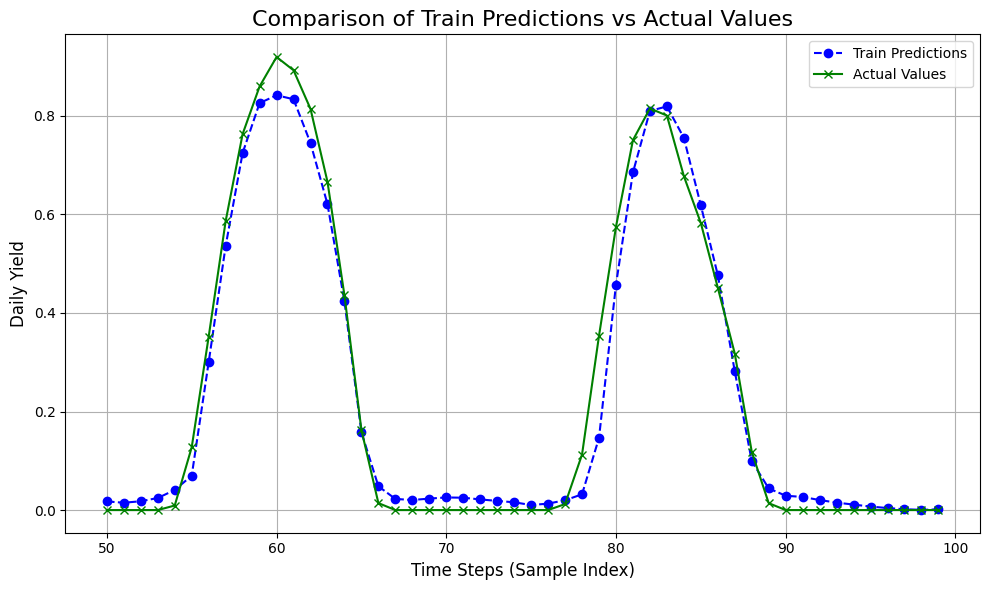

In [47]:
import matplotlib.pyplot as plt

# Set plot size for better visibility
plt.figure(figsize=(10, 6))

# Plot Train Predictions and Actual Values
plt.plot(train_results['Train Predictions'][50:100], label='Train Predictions', color='blue', linestyle='--', marker='o')
plt.plot(train_results['Actual Values'][50:100], label='Actual Values', color='green', linestyle='-', marker='x')

# Add labels, title, and grid
plt.title('Comparison of Train Predictions vs Actual Values', fontsize=16)
plt.xlabel('Time Steps (Sample Index)', fontsize=12)
plt.ylabel('Daily Yield', fontsize=12)
plt.grid(True)

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


##### VALIDATION DATA

In [48]:
# Make predictions on the validation data
val_predictions = model1.predict(X_val).flatten()

# Create a DataFrame to compare predictions and actual values
val_results = pd.DataFrame({
    'Val Predictions': val_predictions,
    'Actual Values': y_val.flatten()  # Ensure y_val is flattened for consistency
})

# Display the DataFrame to check predictions vs actuals
val_results.head()

13/13 [==============================] - 1s 6ms/step


Val Predictions  Actual Values
0         0.038850       0.032639
1         0.153226       0.228600
2         0.440842       0.525311
3         0.684587       0.739377
4         0.806506       0.867595

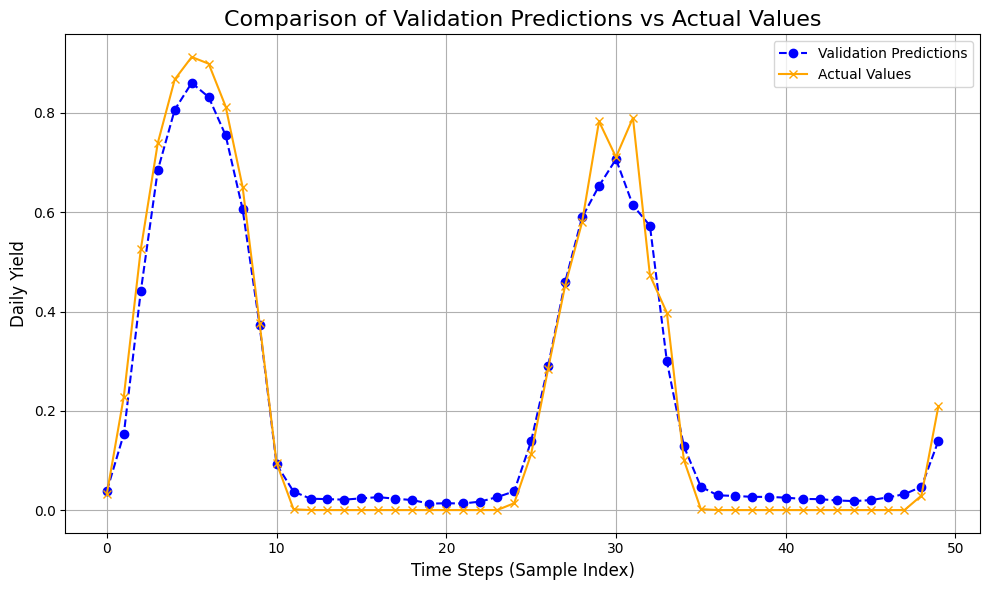

In [49]:
import matplotlib.pyplot as plt

# Set plot size for better visibility
plt.figure(figsize=(10, 6))

# Plot Validation Predictions and Actual Values
plt.plot(val_results['Val Predictions'][:50], label='Validation Predictions', color='blue', linestyle='--', marker='o')
plt.plot(val_results['Actual Values'][:50], label='Actual Values', color='orange', linestyle='-', marker='x')

# Add labels, title, and grid
plt.title('Comparison of Validation Predictions vs Actual Values', fontsize=16)
plt.xlabel('Time Steps (Sample Index)', fontsize=12)
plt.ylabel('Daily Yield', fontsize=12)
plt.grid(True)

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


##### TEST DATASET

In [50]:
# Make predictions on the test data
test_predictions_1 = model1.predict(X_test).flatten()

# Create a DataFrame to compare predictions and actual values
test_results_1 = pd.DataFrame({
    'Test Predictions': test_predictions_1,
    'Actual Values': y_test.flatten()  # Ensure y_test is flattened for consistency
})

# Display the first few rows of the DataFrame
test_results_1.head()


10/10 [==============================] - 0s 4ms/step


Test Predictions  Actual Values
0          0.016642            0.0
1          0.016099            0.0
2          0.014748            0.0
3          0.012392            0.0
4          0.011624            0.0

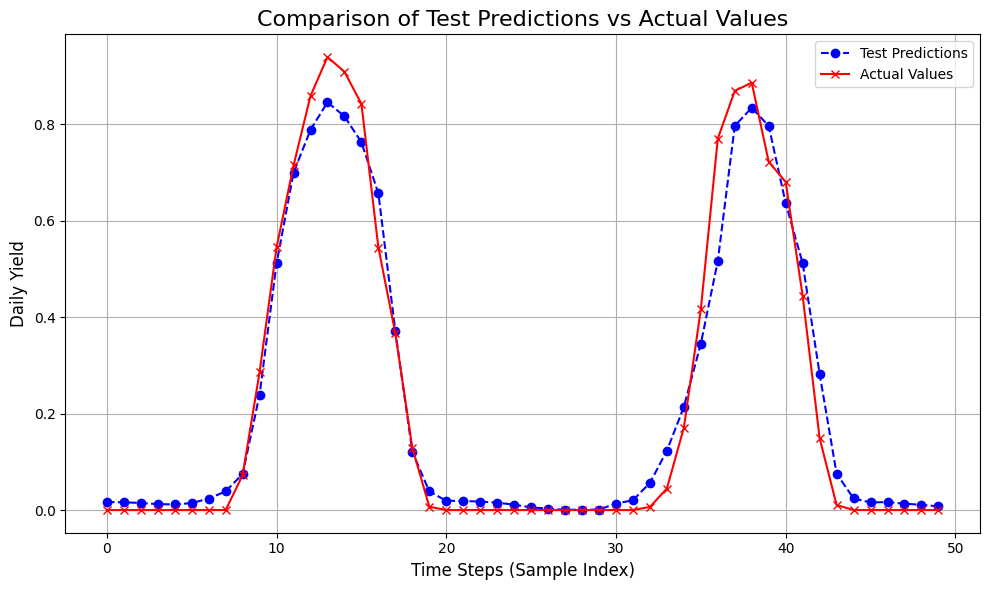

In [51]:
import matplotlib.pyplot as plt

# Set plot size for better visibility
plt.figure(figsize=(10, 6))

# Plot Test Predictions and Actual Values
plt.plot(test_results_1['Test Predictions'][:50], label='Test Predictions', color='blue', linestyle='--', marker='o')
plt.plot(test_results_1['Actual Values'][:50], label='Actual Values', color='red', linestyle='-', marker='x')

# Add labels, title, and grid
plt.title('Comparison of Test Predictions vs Actual Values', fontsize=16)
plt.xlabel('Time Steps (Sample Index)', fontsize=12)
plt.ylabel('Daily Yield', fontsize=12)
plt.grid(True)

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

def evaluate_model_performance(y_true, y_pred):
    """
    Evaluates model performance by computing key metrics and generating visualizations.

    Parameters:
    y_true (array-like): Actual values
    y_pred (array-like): Predicted values

    Returns:
    dict: A dictionary containing calculated metrics (MSE, RMSE, MAE, R²)
    """

    # Flattening inputs if they are not 1D
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    # Calculating key metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Printing metrics
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Residuals calculation
    residuals = y_true - y_pred

    # Plotting residuals distribution
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(residuals, bins=20, edgecolor='black')
    plt.title('Residuals Distribution')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')

    # Plotting Predictions vs Actual Values
    plt.subplot(1, 2, 2)
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.title('Predictions vs Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')  # Ideal line

    plt.tight_layout()
    plt.show()

    # Plotting actual vs predicted over time (for time series or sequential data)
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label='Actual Values')
    plt.plot(y_pred, label='Predicted Values', alpha=0.7)
    plt.title('Actual vs Predicted Values Over Time')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

    # Returning a dictionary of computed metrics
    metrics = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

    return metrics

Mean Squared Error (MSE): 0.0059
Root Mean Squared Error (RMSE): 0.0769
Mean Absolute Error (MAE): 0.0498
R² Score: 0.9367


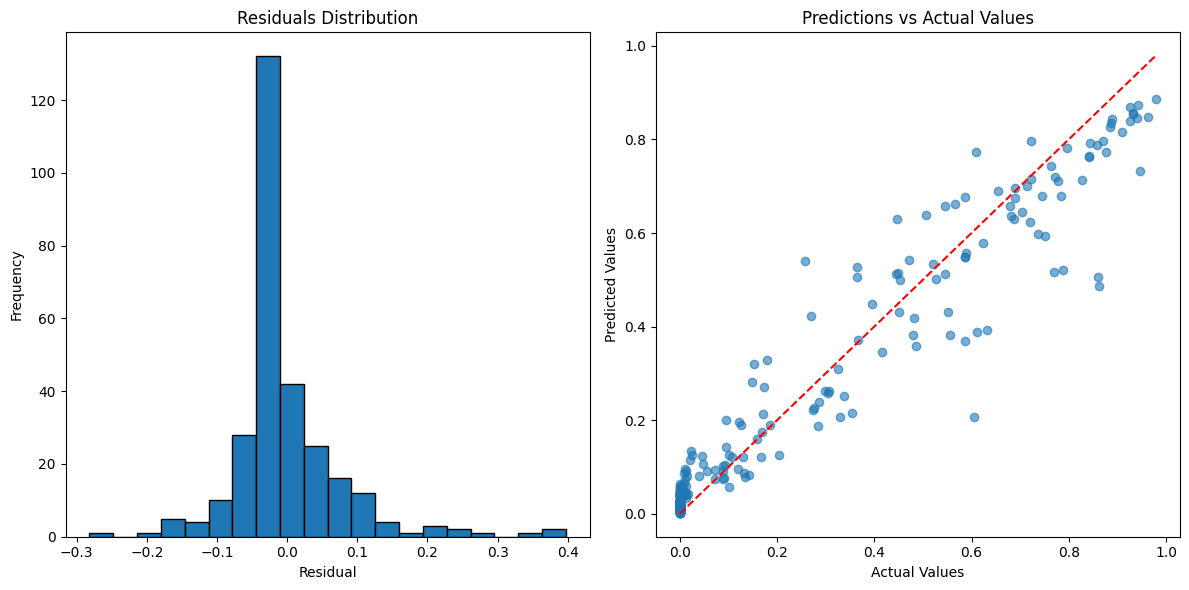

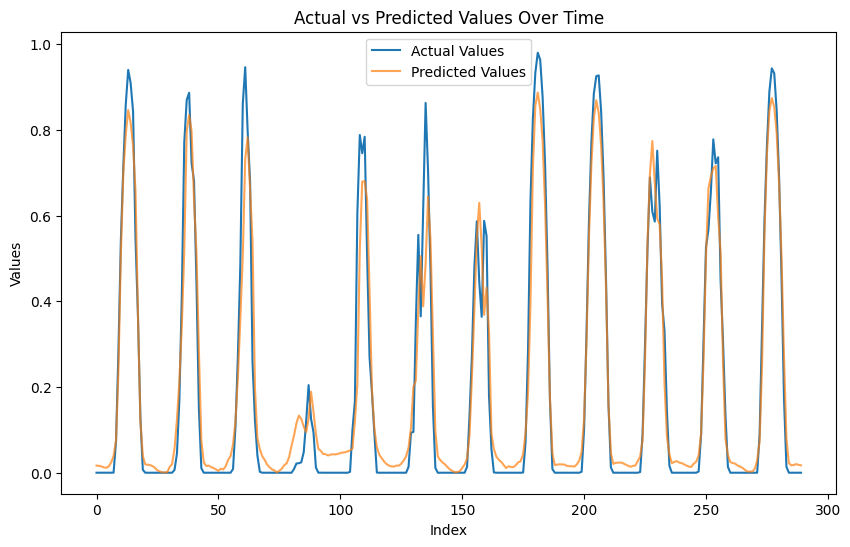

In [53]:
train_metrics_model1 = evaluate_model_performance(y_test, test_predictions_1)

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define Model
model2 = Sequential()

# Stacked LSTM Layers with Dropout
model2.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(Dropout(0.2))
model2.add(LSTM(64, return_sequences=False))
model2.add(Dropout(0.2))

# Dense Layers
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='linear'))

# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['RootMeanSquaredError'])

# Set callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('model2_best.keras', save_best_only=True, monitor='val_loss')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

# Fit the model
history = model2.fit(X_train, y_train,
                     validation_data=(X_val, y_val),
                     epochs=100,
                     batch_size=64,
                     callbacks=[early_stopping, checkpoint, lr_scheduler])

# Load the best model weights
model2.load_weights('model2_best.keras')


Epoch 1/100

125/125 [==============================] - 10s 43ms/step - loss: 0.0252 - root_mean_squared_error: 0.1588 - val_loss: 0.0139 - val_root_mean_squared_error: 0.1181 - lr: 0.0010
Epoch 2/100
125/125 [==============================] - 4s 32ms/step - loss: 0.0110 - root_mean_squared_error: 0.1049 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1011 - lr: 0.0010
Epoch 3/100
125/125 [==============================] - 4s 34ms/step - loss: 0.0084 - root_mean_squared_error: 0.0916 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1001 - lr: 0.0010
Epoch 4/100
125/125 [==============================] - 4s 33ms/step - loss: 0.0073 - root_mean_squared_error: 0.0854 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0798 - lr: 0.0010
Epoch 5/100
125/125 [==============================] - 4s 32ms/step - loss: 0.0065 - root_mean_squared_error: 0.0805 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0776 - lr: 0.0010
Epoch 6/100
125/125 [==============================] - 4s 33ms/

In [55]:
# Print model summary to confirm successful loading
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 24, 128)           70656     
                                                                 
 dropout_1 (Dropout)         (None, 24, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 122177 (477.25 KB)
Trainable params: 122

In [56]:
# Make predictions on the test data
test_predictions_2 = model2.predict(X_test).flatten()

# Create a DataFrame to compare predictions and actual values
test_results_2 = pd.DataFrame({
    'Test Predictions': test_predictions_2,
    'Actual Values': y_test.flatten()  # Ensure y_test is flattened for consistency
})

# Display the first few rows of the DataFrame
test_results_2.head()

10/10 [==============================] - 1s 10ms/step


Test Predictions  Actual Values
0         -0.001590            0.0
1         -0.001519            0.0
2         -0.001782            0.0
3         -0.001961            0.0
4         -0.001700            0.0

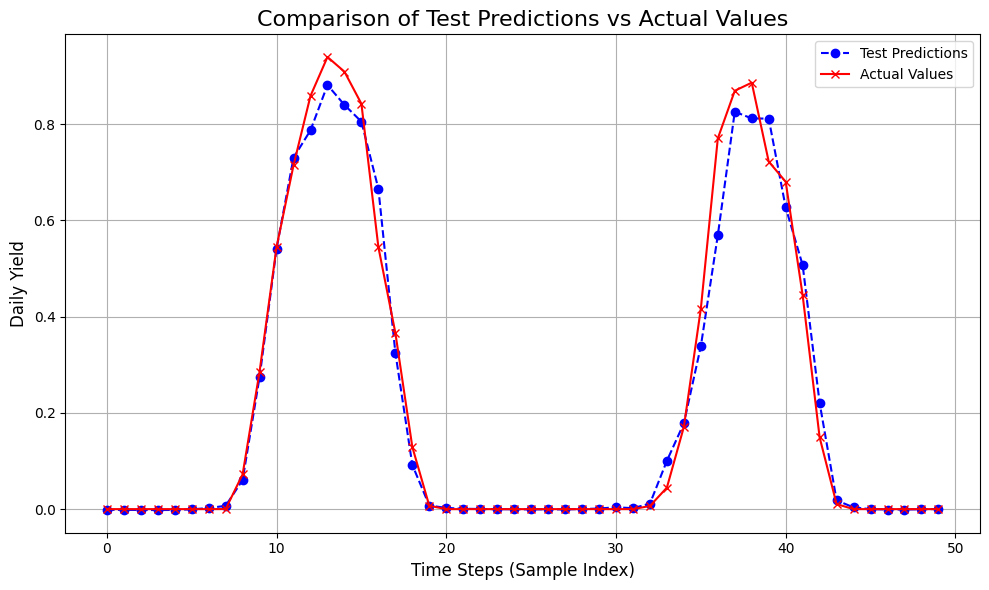

In [57]:
import matplotlib.pyplot as plt

# Set plot size for better visibility
plt.figure(figsize=(10, 6))

# Plot Test Predictions and Actual Values
plt.plot(test_results_2['Test Predictions'][:50], label='Test Predictions', color='blue', linestyle='--', marker='o')
plt.plot(test_results_2['Actual Values'][:50], label='Actual Values', color='red', linestyle='-', marker='x')

# Add labels, title, and grid
plt.title('Comparison of Test Predictions vs Actual Values', fontsize=16)
plt.xlabel('Time Steps (Sample Index)', fontsize=12)
plt.ylabel('Daily Yield', fontsize=12)
plt.grid(True)

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Mean Squared Error (MSE): 0.0039
Root Mean Squared Error (RMSE): 0.0626
Mean Absolute Error (MAE): 0.0305
R² Score: 0.9580


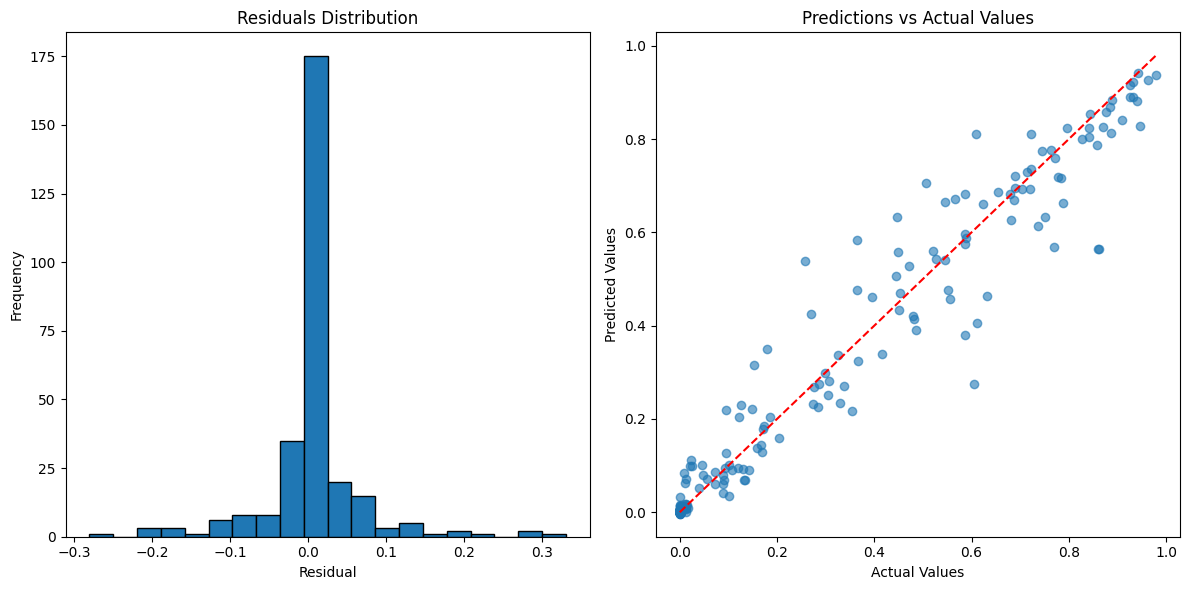

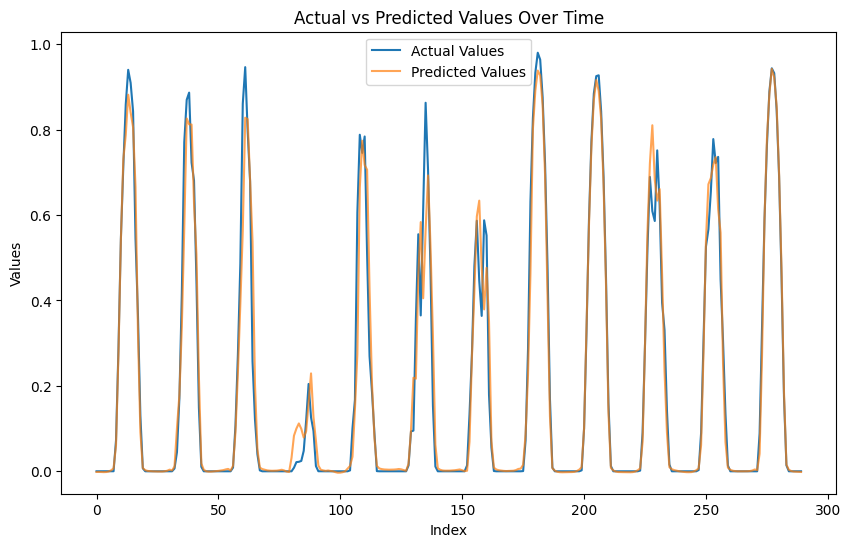

In [58]:
train_metrics_model2 = evaluate_model_performance(y_test, test_predictions_2)

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, InputLayer, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define Model
model3 = Sequential()

sequence_length = X_train.shape[1]  # Make sure this is greater than the kernel size
num_features = X_train.shape[2]

# Stacked LSTM Layers with Dropout
model3.add(Conv1D(32, 2, activation='relu', input_shape=(sequence_length, num_features)))
model3.add(Dropout(0.5))
model3.add(Conv1D(16, 2, activation='relu'))  # Use fewer filters
model3.add(Dropout(0.5))

model3.add(LSTM(64, return_sequences=False))  # Final LSTM layer
model3.add(Dropout(0.2))

# Dense Layers
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='linear'))

# Compile the model
model3.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['RootMeanSquaredError'])

# Set callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('model3_best.keras', save_best_only=True, monitor='val_loss')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

# Fit the model
history = model3.fit(X_train, y_train,
                     validation_data=(X_val, y_val),
                     epochs=100,
                     batch_size=64,
                     callbacks=[early_stopping, checkpoint, lr_scheduler])

# Load the best model weights
model3.load_weights('model3_best.keras')


Epoch 1/100
125/125 [==============================] - 7s 20ms/step - loss: 0.0406 - root_mean_squared_error: 0.2016 - val_loss: 0.0176 - val_root_mean_squared_error: 0.1325 - lr: 0.0010
Epoch 2/100
125/125 [==============================] - 2s 14ms/step - loss: 0.0196 - root_mean_squared_error: 0.1398 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1155 - lr: 0.0010
Epoch 3/100
125/125 [==============================] - 2s 14ms/step - loss: 0.0155 - root_mean_squared_error: 0.1245 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1104 - lr: 0.0010
Epoch 4/100
125/125 [==============================] - 2s 14ms/step - loss: 0.0132 - root_mean_squared_error: 0.1150 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1132 - lr: 0.0010
Epoch 5/100
125/125 [==============================] - 2s 14ms/step - loss: 0.0123 - root_mean_squared_error: 0.1111 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0897 - lr: 0.0010
Epoch 6/100
125/125 [==============================] - 2s 14ms/st

In [60]:
# Print model summary to confirm successful loading
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 32)            608       
                                                                 
 dropout_3 (Dropout)         (None, 23, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 22, 16)            1040      
                                                                 
 dropout_4 (Dropout)         (None, 22, 16)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                20736     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)               

In [61]:
# Make predictions on the test data
test_predictions_3 = model3.predict(X_test).flatten()

# Create a DataFrame to compare predictions and actual values
test_results_3 = pd.DataFrame({
    'Test Predictions': test_predictions_3,
    'Actual Values': y_test.flatten()  # Ensure y_test is flattened for consistency
})

# Display the first few rows of the DataFrame
test_results_3.head()

10/10 [==============================] - 1s 6ms/step


Test Predictions  Actual Values
0         -0.005975            0.0
1         -0.008035            0.0
2         -0.008679            0.0
3         -0.007738            0.0
4         -0.008729            0.0

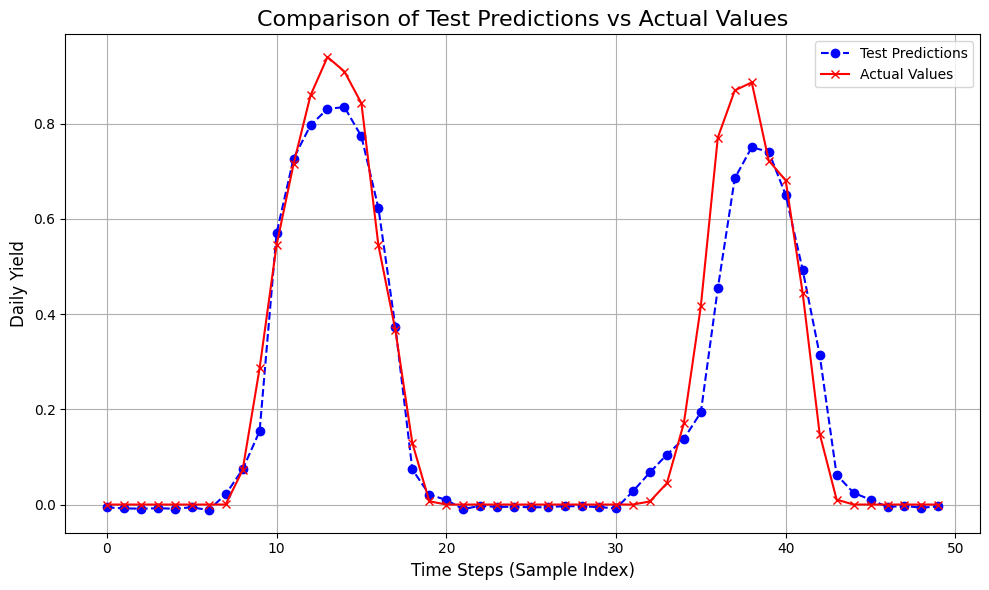

In [62]:
import matplotlib.pyplot as plt

# Set plot size for better visibility
plt.figure(figsize=(10, 6))

# Plot Test Predictions and Actual Values
plt.plot(test_results_3['Test Predictions'][:50], label='Test Predictions', color='blue', linestyle='--', marker='o')
plt.plot(test_results_3['Actual Values'][:50], label='Actual Values', color='red', linestyle='-', marker='x')

# Add labels, title, and grid
plt.title('Comparison of Test Predictions vs Actual Values', fontsize=16)
plt.xlabel('Time Steps (Sample Index)', fontsize=12)
plt.ylabel('Daily Yield', fontsize=12)
plt.grid(True)

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Mean Squared Error (MSE): 0.0098
Root Mean Squared Error (RMSE): 0.0990
Mean Absolute Error (MAE): 0.0556
R² Score: 0.8951


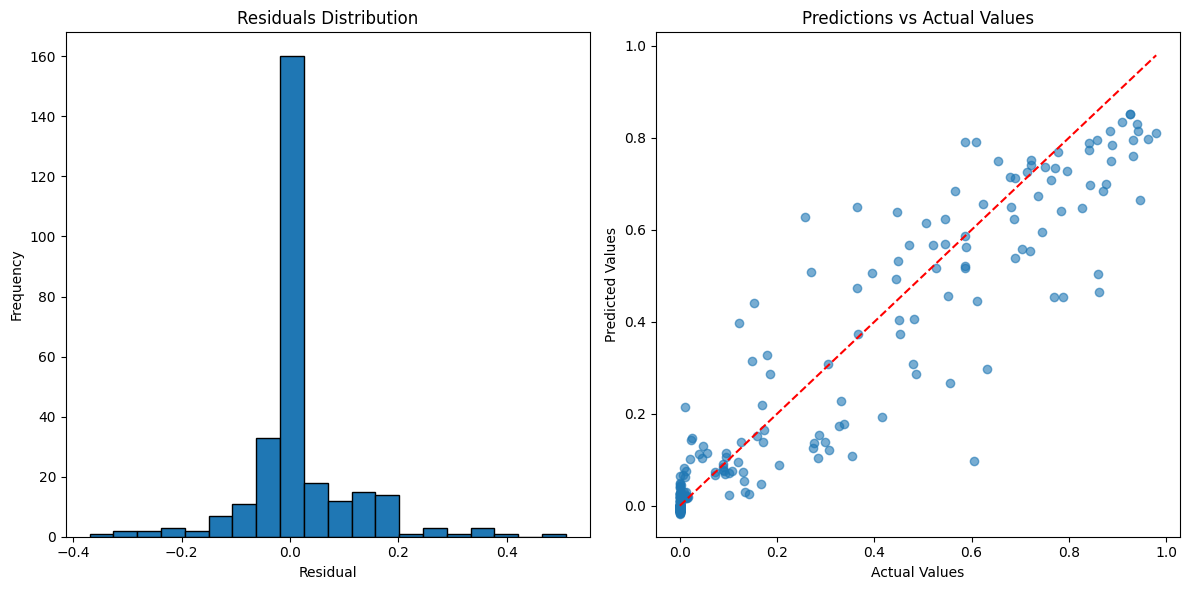

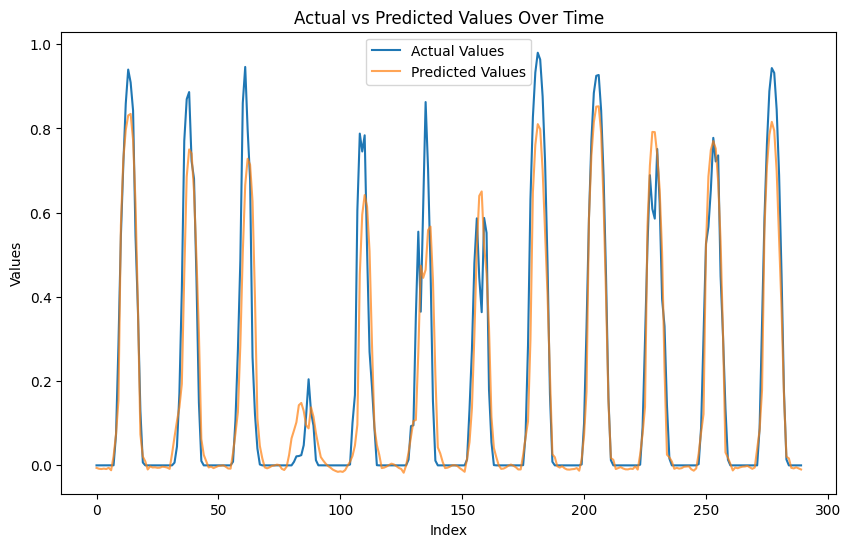

In [63]:
train_metrics_model3 = evaluate_model_performance(y_test, test_predictions_3)

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Conv1D, MultiHeadAttention, LayerNormalization, Reshape

# Define Model
sequence_length = WINDOW_SIZE  # Length of the input sequences
num_features = num_featrues      # Number of features

# Define Input Layer
inputs = Input(shape=(sequence_length, num_features))

# Stacked CNN Layers
x = Conv1D(32, 2, activation='relu')(inputs)
x = Dropout(0.5)(x)
x = Conv1D(16, 2, activation='relu')(x)  # Additional Conv layer
x = Dropout(0.5)(x)

# Reshape for Multi-Head Attention
x = Reshape((-1, 16))(x)  # Adjust as needed to make it compatible for attention

# Add Multi-Head Attention Layer
attention_output = MultiHeadAttention(num_heads=4, key_dim=16)(x, x, x)  # query, key, value are the same
x = Dropout(0.2)(attention_output)
x = LayerNormalization()(x)

# Add LSTM Layer
x = LSTM(64, return_sequences=False)(x)  # Output shape will be (batch_size, 64)
x = Dropout(0.2)(x)

# Dense Layers
x = Dense(16, activation='relu')(x)  # Adjusted dense layer size
outputs = Dense(1, activation='linear')(x)  # Output layer for regression

# Create Model
model4 = Model(inputs=inputs, outputs=outputs)

# Compile the model
model4.compile(optimizer='adam', loss='mean_squared_error', metrics=['RootMeanSquaredError'])

# Set callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('model4_best.keras', save_best_only=True, monitor='val_loss')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

# Fit the model
history = model4.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=64,
                    callbacks=[early_stopping, checkpoint, lr_scheduler])

# Load the best model weights
model4.load_weights('model4_best.keras')



Epoch 1/100
125/125 [==============================] - 9s 32ms/step - loss: 0.0792 - root_mean_squared_error: 0.2814 - val_loss: 0.0931 - val_root_mean_squared_error: 0.3051 - lr: 0.0010
Epoch 2/100
125/125 [==============================] - 3s 22ms/step - loss: 0.0737 - root_mean_squared_error: 0.2714 - val_loss: 0.0892 - val_root_mean_squared_error: 0.2987 - lr: 0.0010
Epoch 3/100
125/125 [==============================] - 3s 21ms/step - loss: 0.0534 - root_mean_squared_error: 0.2311 - val_loss: 0.0242 - val_root_mean_squared_error: 0.1555 - lr: 0.0010
Epoch 4/100
125/125 [==============================] - 3s 23ms/step - loss: 0.0231 - root_mean_squared_error: 0.1520 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1241 - lr: 0.0010
Epoch 5/100
125/125 [==============================] - 3s 21ms/step - loss: 0.0175 - root_mean_squared_error: 0.1321 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1297 - lr: 0.0010
Epoch 6/100
125/125 [==============================] - 3s 22ms/s

In [65]:
# Print model summary to confirm successful loading
model4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 24, 9)]              0         []                            
                                                                                                  
 conv1d_2 (Conv1D)           (None, 23, 32)               608       ['input_2[0][0]']             
                                                                                                  
 dropout_6 (Dropout)         (None, 23, 32)               0         ['conv1d_2[0][0]']            
                                                                                                  
 conv1d_3 (Conv1D)           (None, 22, 16)               1040      ['dropout_6[0][0]']           
                                                                                              

In [66]:
# Make predictions on the test data
test_predictions_4 = model4.predict(X_test).flatten()

# Create a DataFrame to compare predictions and actual values
test_results_4 = pd.DataFrame({
    'Test Predictions': test_predictions_4,
    'Actual Values': y_test.flatten()  # Ensure y_test is flattened for consistency
})

# Display the first few rows of the DataFrame
test_results_4.head()

10/10 [==============================] - 1s 7ms/step


Test Predictions  Actual Values
0         -0.003475            0.0
1         -0.003482            0.0
2         -0.001580            0.0
3          0.000276            0.0
4         -0.001351            0.0

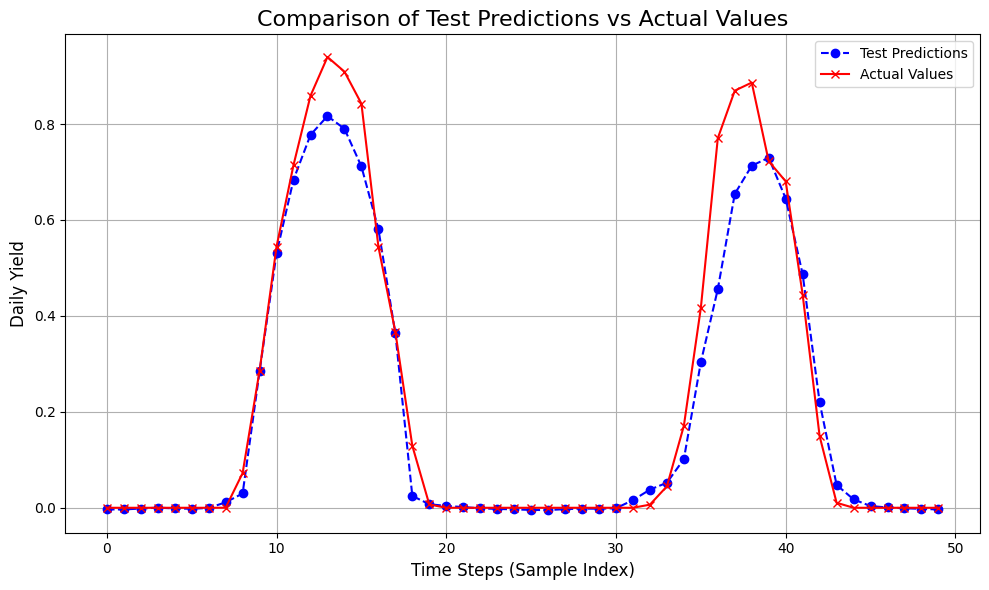

In [67]:
import matplotlib.pyplot as plt

# Set plot size for better visibility
plt.figure(figsize=(10, 6))

# Plot Test Predictions and Actual Values
plt.plot(test_results_4['Test Predictions'][:50], label='Test Predictions', color='blue', linestyle='--', marker='o')
plt.plot(test_results_4['Actual Values'][:50], label='Actual Values', color='red', linestyle='-', marker='x')

# Add labels, title, and grid
plt.title('Comparison of Test Predictions vs Actual Values', fontsize=16)
plt.xlabel('Time Steps (Sample Index)', fontsize=12)
plt.ylabel('Daily Yield', fontsize=12)
plt.grid(True)

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Mean Squared Error (MSE): 0.0105
Root Mean Squared Error (RMSE): 0.1025
Mean Absolute Error (MAE): 0.0546
R² Score: 0.8876


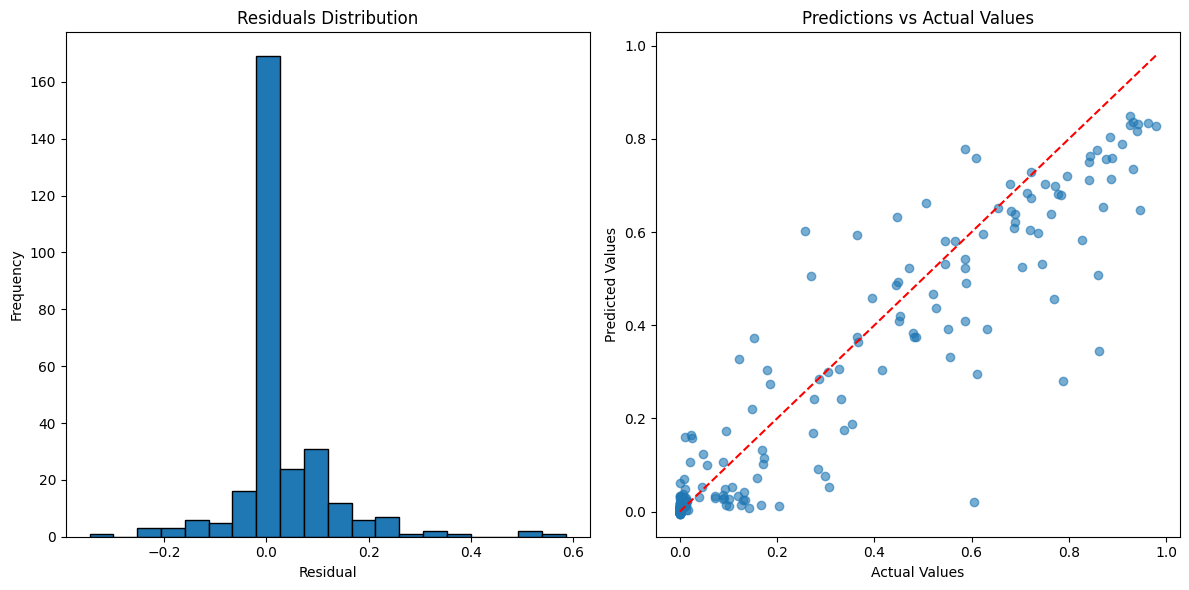

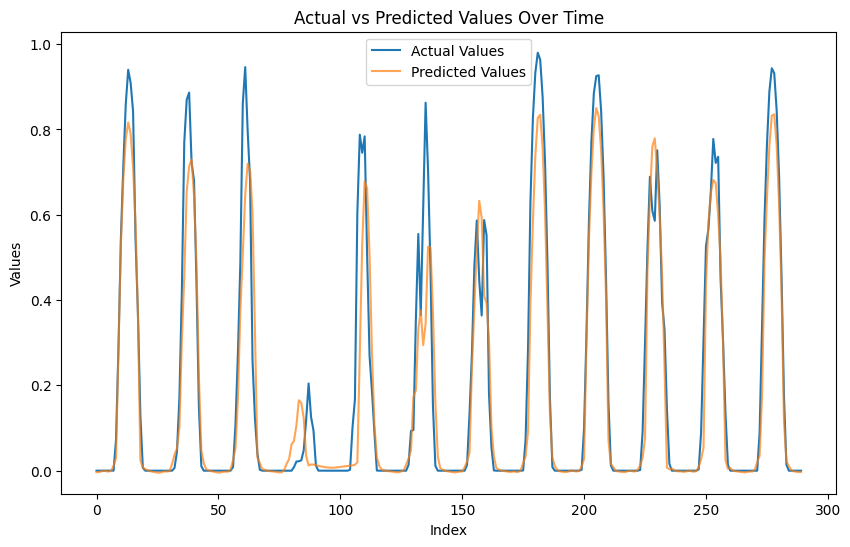

In [68]:
train_metrics_model4 = evaluate_model_performance(y_test, test_predictions_4)

### Multi-Step-Model

In [69]:
def multi_df_to_X_y(df, window_size=5, future_steps=6):  
    """
    Converts a DataFrame to input-output sequences for LSTM training,
    where each input sequence is of length 'window_size' and 
    each output sequence predicts 'future_steps' values ahead.

    Parameters:
    df (pd.DataFrame): The input dataframe with time-series data.
    window_size (int): The number of previous time steps to use as input for prediction.
    future_steps (int): The number of future time steps to predict.

    Returns:
    X (np.ndarray): Input data with shape (n_samples, window_size, n_features).
    y (np.ndarray): Target data with shape (n_samples, future_steps).
    """
    df_as_np = df.to_numpy()  # Convert the dataframe to numpy arrays
    X = []
    y = []
    
    # Loop through the data and create sequences
    for i in range(len(df_as_np) - window_size - future_steps + 1):
        # Extract window_size timesteps as input features
        row = [[a] for a in df_as_np[i:i + window_size]]
        X.append(row)
        
        # Extract future_steps timesteps as labels (the next 'future_steps' values)
        label = df_as_np[i + window_size:i + window_size + future_steps, 0]
        y.append(label)
    
    return np.array(X), np.array(y)


In [70]:
WINDOW_SIZE = 12
future_steps = 24
X_multi, y_multi = multi_df_to_X_y(df_pred, WINDOW_SIZE, future_steps)
X_multi.shape, y_multi.shape

((8679, 12, 1, 9), (8679, 24))

In [71]:
X_multi = np.squeeze(X_multi)
y_multi = np.squeeze(y_multi)
print(X_multi.shape, y_multi.shape)

(8679, 12, 9) (8679, 24)


In [72]:
# making a train and test dataset to train the model

X_multi_train, y_multi_train  = X_multi[:8000], y_multi[:8000]
X_multi_val, y_multi_val  = X_multi[8000:8400], y_multi[8000:8400]
X_multi_test, y_multi_test  = X_multi[8400:], y_multi[8400:]

In [73]:
X_multi_train = X_multi_train.astype('float32')
y_multi_train = y_multi_train.astype('float32')
X_multi_val = X_multi_val.astype('float32')
y_multi_val = y_multi_val.astype('float32')
X_multi_test = X_multi_test.astype('float32')
y_multi_test = y_multi_test.astype('float32')

In [74]:
print(X_multi_train.shape, y_multi_train.shape)
print(X_multi_val.shape, y_multi_val.shape)
print(X_multi_test.shape, y_multi_test.shape)
print(X_multi_train.shape[1], X_multi_train.shape[2])

(8000, 12, 9) (8000, 24)
(400, 12, 9) (400, 24)
(279, 12, 9) (279, 24)
12 9


In [75]:
#  Tensorflow imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, InputLayer, Dropout

# Defining the model and adding layers into the LSTM model
model1_multi = Sequential()

# Assuming input shape of (5, 1) for 60 minutes of daily yield data
model1_multi.add(InputLayer(input_shape=(X_multi_train.shape[1], X_multi_train.shape[2])))  # 5 time steps, 1 feature

# LSTM layer with 32 units, reduced from 64 to prevent overfitting
model1_multi.add(LSTM(32))

# Adding a Dense layer with 8 units and ReLU activation
model1_multi.add(Dense(8, activation='relu'))

# Adding Dropout for regularization (optional, 0.2 means 20% dropout rate)
model1_multi.add(Dropout(0.2))

# Output layer for a single value prediction with linear activation
model1_multi.add(Dense(future_steps, activation='linear'))

# Compile the model
model1_multi.compile(optimizer='adam', loss='mse')

# Model summary to check the architecture
model1_multi.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 32)                5376      
                                                                 
 dense_8 (Dense)             (None, 8)                 264       
                                                                 
 dropout_10 (Dropout)        (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 24)                216       
                                                                 
Total params: 5856 (22.88 KB)
Trainable params: 5856 (22.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

# Define the model checkpoint callback
# Save the best model based on validation loss (lowest RMSE)
cp = ModelCheckpoint(
    filepath='model1_multi/best_model.keras',  # Use .h5 extension for model saving
    monitor='val_root_mean_squared_error',  # Monitor validation RMSE
    save_best_only=True,
    save_weights_only=False,  # Save full model instead of just weights
    verbose=1  # Print out saving messages
)

# Add early stopping to stop training if the model stops improving
es = EarlyStopping(
    monitor='val_root_mean_squared_error',  # Stop if RMSE doesn't improve
    patience=10,  # Wait 10 epochs before stopping
    restore_best_weights=True,  # Restore the best weights after stopping
    verbose=1
)

# Compile the model
# Lower learning rate is set to help the optimizer converge more smoothly
model1_multi.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(learning_rate=1e-4),  # 0.0001 is written as 1e-4 for clarity
    metrics=[RootMeanSquaredError()]  # RMSE metric for model evaluation
)


In [77]:
# Fit the model with better structure, additional callbacks, and dynamic batch size
model1_multi.fit(
    X_multi_train,
    y_multi_train,
    validation_data=(X_multi_val, y_multi_val),  # Provide validation data for real-time evaluation
    epochs=75,  # Increase epochs for a more robust model, can be adjusted later
    batch_size=32,  # Use a moderate batch size (adjust based on your hardware)
    callbacks=[cp, es],  # Include EarlyStopping for better convergence
    verbose=1  # Show training progress
)

Epoch 1/75
244/250 [============================>.] - ETA: 0s - loss: 0.0997 - root_mean_squared_error: 0.3158
Epoch 1: val_root_mean_squared_error improved from inf to 0.32710, saving model to model1_multi\best_model.keras
250/250 [==============================] - 5s 9ms/step - loss: 0.0993 - root_mean_squared_error: 0.3151 - val_loss: 0.1070 - val_root_mean_squared_error: 0.3271
Epoch 2/75
240/250 [===========================>..] - ETA: 0s - loss: 0.0823 - root_mean_squared_error: 0.2869
Epoch 2: val_root_mean_squared_error improved from 0.32710 to 0.30620, saving model to model1_multi\best_model.keras
250/250 [==============================] - 2s 6ms/step - loss: 0.0819 - root_mean_squared_error: 0.2863 - val_loss: 0.0938 - val_root_mean_squared_error: 0.3062
Epoch 3/75
244/250 [============================>.] - ETA: 0s - loss: 0.0747 - root_mean_squared_error: 0.2733
Epoch 3: val_root_mean_squared_error improved from 0.30620 to 0.29239, saving model to model1_multi\best_model.kera

In [78]:
from tensorflow.keras.models import load_model

# Load the best saved model
model1_multi = load_model('model1_multi/best_model.keras')  # Use the correct file extension and path

# Print model summary to confirm successful loading
model1_multi.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 32)                5376      
                                                                 
 dense_8 (Dense)             (None, 8)                 264       
                                                                 
 dropout_10 (Dropout)        (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 24)                216       
                                                                 
Total params: 5856 (22.88 KB)
Trainable params: 5856 (22.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### TRAIN DATASET

In [79]:
# Make predictions on the training data
train_predictions_multi = model1_multi.predict(X_multi_train).flatten()

# Create a DataFrame to compare predictions and actual values
train_results_multi = pd.DataFrame({
    'Train Predictions': train_predictions_multi,
    'Actual Values': y_multi_train.flatten()  # Ensure y_train is also flattened for consistency
})

# Optionally display the first few rows of the DataFrame to verify
train_results_multi.head()

print(train_results_multi.shape)
print(train_results_multi["Train Predictions"].shape)
print(train_results_multi["Actual Values"].shape)

250/250 [==============================] - 1s 4ms/step
(192000, 2)
(192000,)
(192000,)


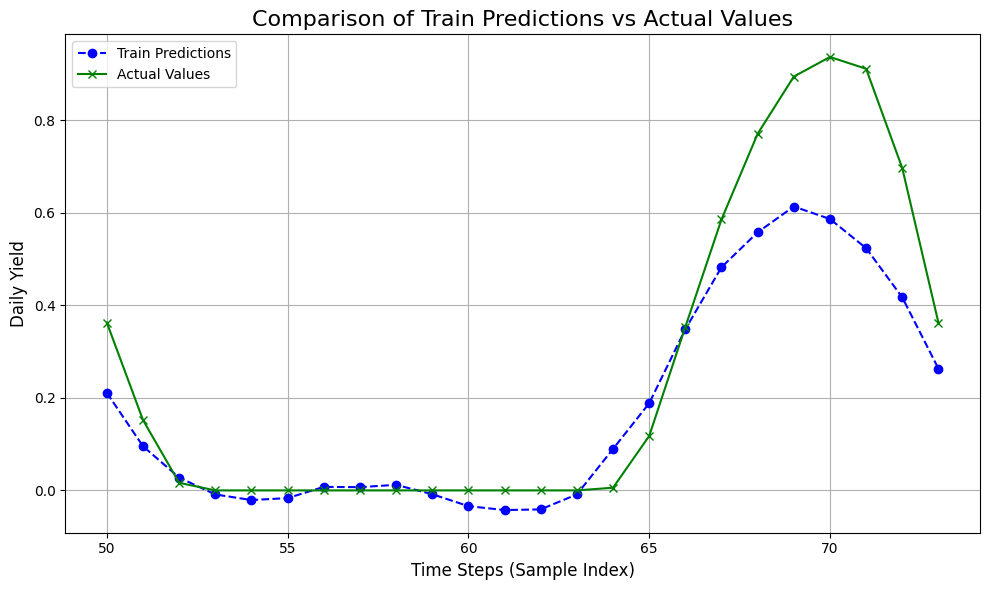

In [80]:
import matplotlib.pyplot as plt

# Set plot size for better visibility
plt.figure(figsize=(10, 6))

# Plot Train Predictions and Actual Values
plt.plot(train_results_multi['Train Predictions'][50:50+future_steps], label='Train Predictions', color='blue', linestyle='--', marker='o')
plt.plot(train_results_multi['Actual Values'][50:50+future_steps], label='Actual Values', color='green', linestyle='-', marker='x')

# Add labels, title, and grid
plt.title('Comparison of Train Predictions vs Actual Values', fontsize=16)
plt.xlabel('Time Steps (Sample Index)', fontsize=12)
plt.ylabel('Daily Yield', fontsize=12)
plt.grid(True)

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


##### VALIDATION DATA

In [81]:
# Make predictions on the validation data
val_multi_predictions = model1_multi.predict(X_multi_val).flatten()

# Create a DataFrame to compare predictions and actual values
val_results_multi = pd.DataFrame({
    'Val Predictions': val_multi_predictions,
    'Actual Values': y_multi_val.flatten()  # Ensure y_val is flattened for consistency
})

# Display the DataFrame to check predictions vs actuals
val_results_multi.head()

13/13 [==============================] - 1s 3ms/step


Val Predictions  Actual Values
0         0.027128            0.0
1        -0.014756            0.0
2        -0.029077            0.0
3        -0.028141            0.0
4        -0.020255            0.0

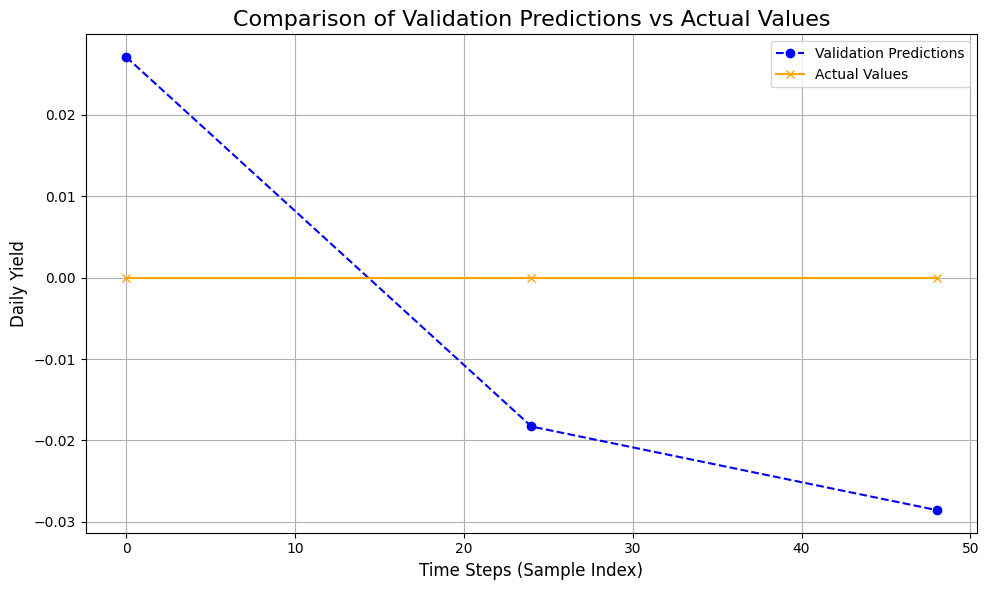

In [82]:
import matplotlib.pyplot as plt

# Set plot size for better visibility
plt.figure(figsize=(10, 6))

# Plot Validation Predictions and Actual Values
plt.plot(val_results_multi['Val Predictions'][:50:future_steps], label='Validation Predictions', color='blue', linestyle='--', marker='o')
plt.plot(val_results_multi['Actual Values'][:50:future_steps], label='Actual Values', color='orange', linestyle='-', marker='x')

# Add labels, title, and grid
plt.title('Comparison of Validation Predictions vs Actual Values', fontsize=16)
plt.xlabel('Time Steps (Sample Index)', fontsize=12)
plt.ylabel('Daily Yield', fontsize=12)
plt.grid(True)

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


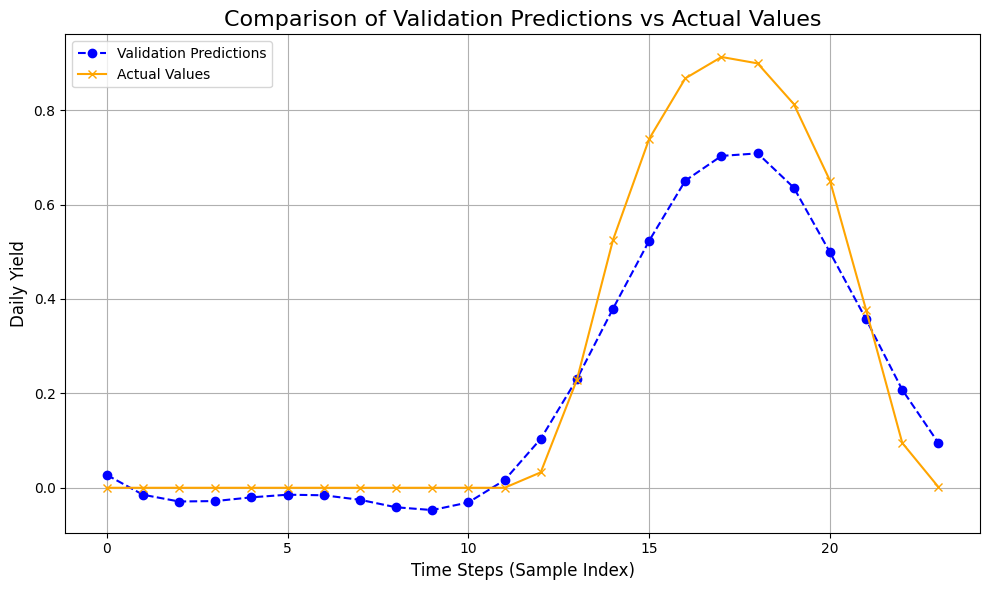

In [83]:
import matplotlib.pyplot as plt

# Set plot size for better visibility
plt.figure(figsize=(10, 6))

# Plot Validation Predictions and Actual Values
plt.plot(val_results_multi['Val Predictions'][:future_steps], label='Validation Predictions', color='blue', linestyle='--', marker='o')
plt.plot(val_results_multi['Actual Values'][:future_steps], label='Actual Values', color='orange', linestyle='-', marker='x')

# Add labels, title, and grid
plt.title('Comparison of Validation Predictions vs Actual Values', fontsize=16)
plt.xlabel('Time Steps (Sample Index)', fontsize=12)
plt.ylabel('Daily Yield', fontsize=12)
plt.grid(True)

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


##### TEST DATASET

In [84]:
# Make predictions on the test data
test_predictions_1_multi = model1_multi.predict(X_multi_test).flatten()

# Create a DataFrame to compare predictions and actual values
test_results_1_multi = pd.DataFrame({
    'Test Predictions': test_predictions_1_multi,
    'Actual Values': y_multi_test.flatten()  # Ensure y_test is flattened for consistency
})

# Display the first few rows of the DataFrame
test_results_1_multi.head()


9/9 [==============================] - 0s 3ms/step


Test Predictions  Actual Values
0          0.700042       0.863530
1          0.738061       0.916985
2          0.712000       0.902574
3          0.618389       0.826456
4          0.480434       0.665846

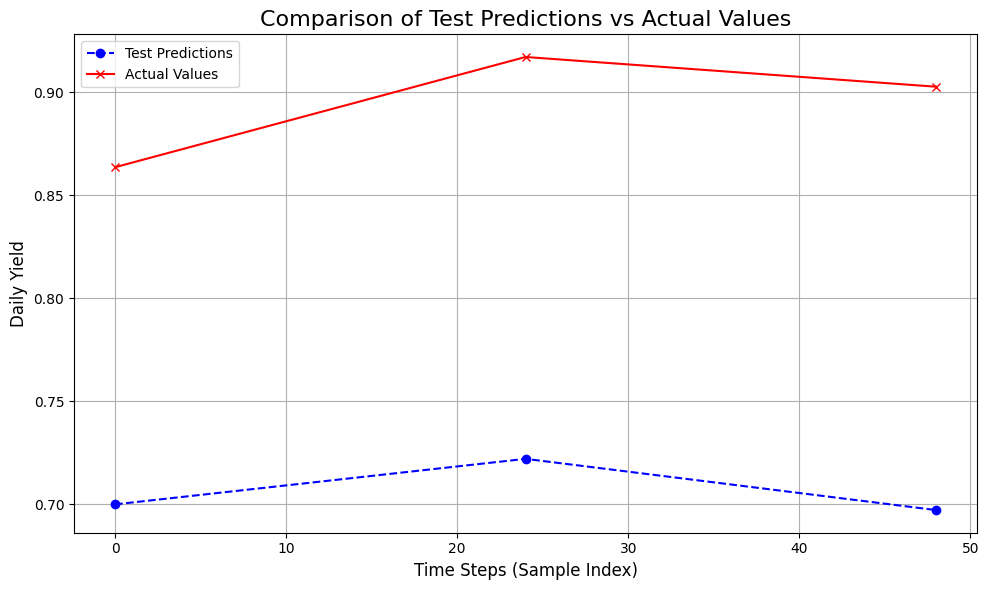

In [85]:
import matplotlib.pyplot as plt

# Set plot size for better visibility
plt.figure(figsize=(10, 6))

# Plot Test Predictions and Actual Values
plt.plot(test_results_1_multi['Test Predictions'][:50:future_steps], label='Test Predictions', color='blue', linestyle='--', marker='o')
plt.plot(test_results_1_multi['Actual Values'][:50:future_steps], label='Actual Values', color='red', linestyle='-', marker='x')

# Add labels, title, and grid
plt.title('Comparison of Test Predictions vs Actual Values', fontsize=16)
plt.xlabel('Time Steps (Sample Index)', fontsize=12)
plt.ylabel('Daily Yield', fontsize=12)
plt.grid(True)

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

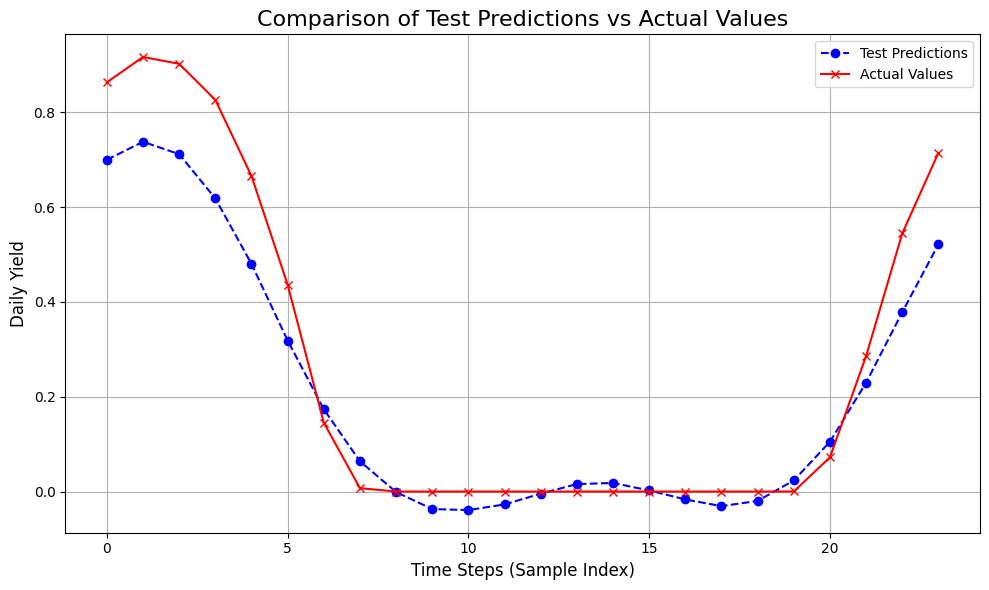

In [86]:
import matplotlib.pyplot as plt

# Set plot size for better visibility
plt.figure(figsize=(10, 6))

# Plot Test Predictions and Actual Values
plt.plot(test_results_1_multi['Test Predictions'][:future_steps], label='Test Predictions', color='blue', linestyle='--', marker='o')
plt.plot(test_results_1_multi['Actual Values'][:future_steps], label='Actual Values', color='red', linestyle='-', marker='x')

# Add labels, title, and grid
plt.title('Comparison of Test Predictions vs Actual Values', fontsize=16)
plt.xlabel('Time Steps (Sample Index)', fontsize=12)
plt.ylabel('Daily Yield', fontsize=12)
plt.grid(True)

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

def evaluate_model_performance(y_multi_true, y_multi_pred):
    """
    Evaluates model performance by computing key metrics and generating visualizations.

    Parameters:
    y_true (array-like): Actual values
    y_pred (array-like): Predicted values

    Returns:
    dict: A dictionary containing calculated metrics (MSE, RMSE, MAE, R²)
    """

    # Flattening inputs if they are not 1D
    y_multi_true = y_multi_true.flatten()
    y_multi_pred = y_multi_pred.flatten()

    # Calculating key metrics
    mse = mean_squared_error(y_multi_true, y_multi_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_multi_true, y_multi_pred)
    r2 = r2_score(y_multi_true, y_multi_pred)

    # Printing metrics
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Residuals calculation
    residuals_multi = y_multi_true - y_multi_pred

    # Plotting residuals distribution
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(residuals_multi, bins=20, edgecolor='black')
    plt.title('Residuals Distribution')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')

    # Plotting Predictions vs Actual Values
    plt.subplot(1, 2, 2)
    plt.scatter(y_multi_true, y_multi_pred, alpha=0.6)
    plt.title('Predictions vs Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([min(y_multi_true), max(y_multi_true)], [min(y_multi_true), max(y_multi_true)], color='red', linestyle='--')  # Ideal line

    plt.tight_layout()
    plt.show()

    # Plotting actual vs predicted over time (for time series or sequential data)
    plt.figure(figsize=(10, 6))
    plt.plot(y_multi_true, label='Actual Values')
    plt.plot(y_multi_pred, label='Predicted Values', alpha=0.7)
    plt.title('Actual vs Predicted Values Over Time')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

    # Returning a dictionary of computed metrics
    metrics = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

    return metrics

Mean Squared Error (MSE): 0.0220
Root Mean Squared Error (RMSE): 0.1485
Mean Absolute Error (MAE): 0.0978
R² Score: 0.7614


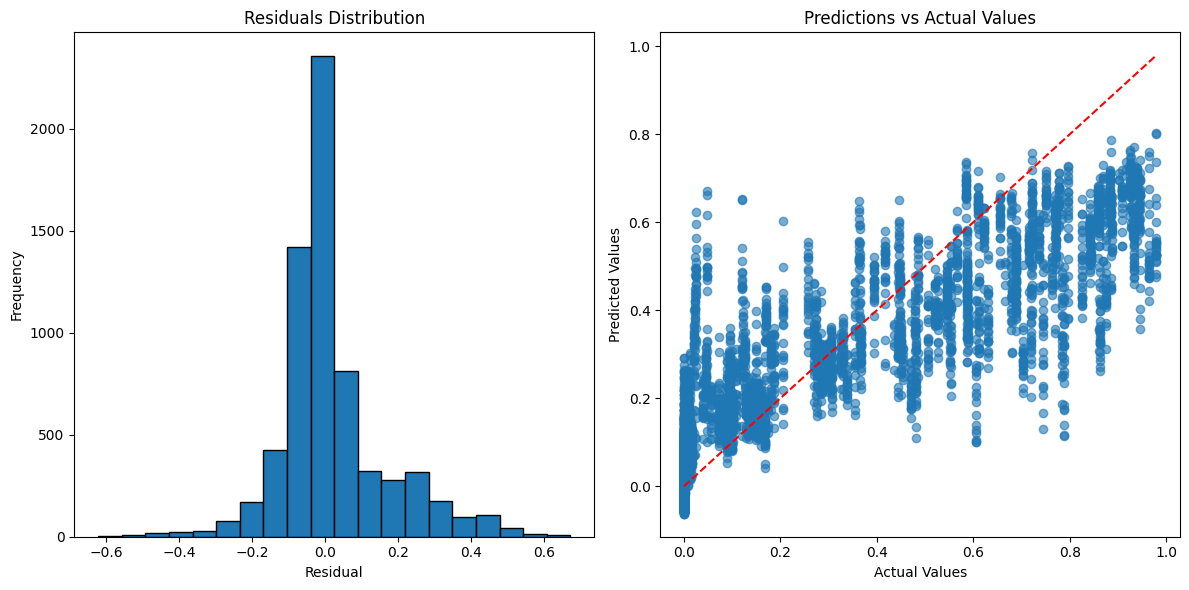

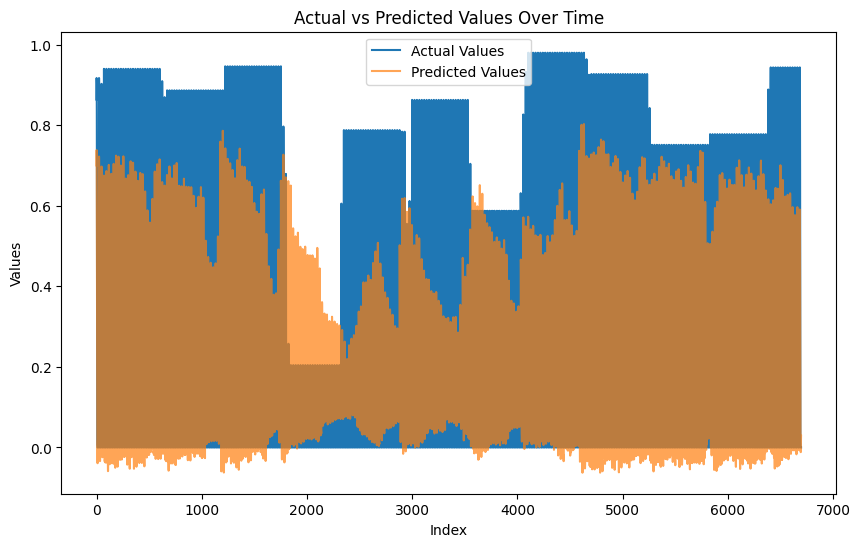

In [88]:
train_metrics_model1_multi = evaluate_model_performance(y_multi_test, test_predictions_1_multi)

### Auto Regression

#### Prediction only

In [89]:
# print(X_test)
print(f"Shape: {X_test.shape}")
for i in range(min(5, X_test.shape[0])):
    print(f"Slice {i + 1}:")
    print(X_test[i][:5, :])  # Show first 5 rows and 9 columns of each slice
    print("-" * 40)


Shape: (290, 24, 9)
Slice 1:
[[0.         0.4360587  0.11235955 0.6944444  0.7282609  0.61622804
  0.         0.         0.27009645]
 [0.         0.42138365 0.21348314 0.05555556 0.7826087  0.61403507
  0.         0.         0.2652733 ]
 [0.         0.4025157  0.17977528 0.9444444  0.8043478  0.61622804
  0.         0.         0.255627  ]
 [0.         0.4004193  0.15730338 0.6944444  0.65217394 0.62061405
  0.         0.         0.24598071]
 [0.         0.41509435 0.21348314 0.75       0.4673913  0.62061405
  0.         0.         0.2363344 ]]
----------------------------------------
Slice 2:
[[0.         0.42138365 0.21348314 0.05555556 0.7826087  0.61403507
  0.         0.         0.2652733 ]
 [0.         0.4025157  0.17977528 0.9444444  0.8043478  0.61622804
  0.         0.         0.255627  ]
 [0.         0.4004193  0.15730338 0.6944444  0.65217394 0.62061405
  0.         0.         0.24598071]
 [0.         0.41509435 0.21348314 0.75       0.4673913  0.62061405
  0.         0.     

In [90]:
# print(X_test)
print(f"Shape: {X_test.shape}")
for i in range(min(5, X_test.shape[0])):
    print(f"Slice {i + 1}:")
    print(X_test[i][-5:, :])  # Show last 5 rows and 9 columns of each slice
    print("-" * 40)

Shape: (290, 24, 9)
Slice 1:
[[0.00714374 0.5555556  0.29213482 0.3888889  0.3152174  0.5899123
  1.         0.         0.40192926]
 [0.         0.5324948  0.17977528 0.44444445 0.35869566 0.5986842
  0.         0.         0.34405145]
 [0.         0.5031447  0.11235955 0.8055556  0.4347826  0.6052632
  0.         0.         0.31511253]
 [0.         0.4821803  0.03370786 0.         0.47826087 0.6030702
  0.         0.5        0.29581994]
 [0.         0.46331236 0.03370786 0.         0.51086956 0.6096491
  0.         0.         0.2813505 ]]
----------------------------------------
Slice 2:
[[0.         0.5324948  0.17977528 0.44444445 0.35869566 0.5986842
  0.         0.         0.34405145]
 [0.         0.5031447  0.11235955 0.8055556  0.4347826  0.6052632
  0.         0.         0.31511253]
 [0.         0.4821803  0.03370786 0.         0.47826087 0.6030702
  0.         0.5        0.29581994]
 [0.         0.46331236 0.03370786 0.         0.51086956 0.6096491
  0.         0.         0.281

In [91]:
print(y_test)
print(f"Shape: {y_test.shape}")


[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.23167876e-04
 7.22995475e-02 2.85995811e-01 5.44648349e-01 7.14743197e-01
 8.58972788e-01 9.39770937e-01 9.09225285e-01 8.42468262e-01
 5.44525206e-01 3.66424441e-01 1.29203111e-01 6.89740106e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.52789744e-03 4.47099395e-02 1.70833841e-01 4.16553766e-01
 7.70415068e-01 8.69565189e-01 8.86439204e-01 7.22379625e-01
 6.80502534e-01 4.44389701e-01 1.49156302e-01 1.04692699e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.62175133e-03 1.07402392e-01 2.73802191e-01 4.85897273e-01
 8.60450804e-01 9.46052492e-01 7.96649814e-01 6.79024518e-01
 2.57420868e-01 1.216898

In [92]:
X_test[1]

array([[0.0000000e+00, 4.2138365e-01, 2.1348314e-01, 5.5555556e-02,
        7.8260869e-01, 6.1403507e-01, 0.0000000e+00, 0.0000000e+00,
        2.6527330e-01],
       [0.0000000e+00, 4.0251571e-01, 1.7977528e-01, 9.4444442e-01,
        8.0434781e-01, 6.1622804e-01, 0.0000000e+00, 0.0000000e+00,
        2.5562701e-01],
       [0.0000000e+00, 4.0041929e-01, 1.5730338e-01, 6.9444442e-01,
        6.5217394e-01, 6.2061405e-01, 0.0000000e+00, 0.0000000e+00,
        2.4598071e-01],
       [0.0000000e+00, 4.1509435e-01, 2.1348314e-01, 7.5000000e-01,
        4.6739131e-01, 6.2061405e-01, 0.0000000e+00, 0.0000000e+00,
        2.3633440e-01],
       [0.0000000e+00, 4.0880504e-01, 3.4831461e-01, 8.0555558e-01,
        4.6739131e-01, 6.1403507e-01, 0.0000000e+00, 0.0000000e+00,
        2.3151125e-01],
       [0.0000000e+00, 3.8155136e-01, 2.1348314e-01, 8.0555558e-01,
        5.1086956e-01, 6.2280703e-01, 0.0000000e+00, 0.0000000e+00,
        2.2186495e-01],
       [1.2316788e-04, 3.8155136e-01, 1.

In [93]:


# Autoregression function for inference
def autoregressive_predict(model, initial_input, n_steps):
    """
    Generates autoregressive predictions for `n_steps` future time steps.

    Parameters:
    - model: Trained model to use for predictions
    - initial_input: Initial input array with shape (1, time_steps, features)
    - n_steps: Number of time steps to predict autoregressively

    Returns:
    - predictions: Array of predicted values for `n_steps` time steps
    """
    # Ensure the input has batch dimension
    current_input = np.expand_dims(initial_input, axis=0)
    predictions = []

    for _ in range(n_steps):
        # Make a single-step prediction
        next_step_pred = model.predict(current_input, verbose=0)
        predictions.append(next_step_pred[0][0])  # Collect the prediction

        # Use the prediction as the new input (shift input window)
        # Remove the oldest time step and add the new prediction at the end
        current_input = np.roll(current_input, shift=-1, axis=1)
        current_input[0, -1, 0] = next_step_pred[0][0]  # Update last step with prediction

    return np.array(predictions)

# Example usage
# Start with a sample from the test data, e.g., the first test sequence

start_step = 200  # Start from the 10th data point in X_test
initial_input = X_test[start_step]  # Shape: (24, 9)
n_steps = 60  # Number of steps to autoregressively predict
auto_reg_model = model1

# Generate autoregressive predictions
predictions = autoregressive_predict(auto_reg_model, initial_input, n_steps)
print("Autoregressive Predictions:", predictions)


Autoregressive Predictions: [ 0.12549165  0.2989443   0.46671176  0.6485516   0.74566114  0.7540336
  0.6885074   0.5770178   0.39780635  0.15119046  0.03921967  0.01726548
  0.00537834  0.0108      0.01389799  0.0151672   0.0165246   0.01594853
  0.0175245   0.02004787  0.02180948  0.02967561  0.04764599  0.10251565
  0.25013924  0.3851748   0.49072218  0.6003994   0.6282073   0.57528025
  0.464907    0.31335413  0.1038049   0.03122491  0.01385511  0.00465499
 -0.00250486  0.00449404  0.00879941  0.01064901  0.01349092  0.01538224
  0.0198544   0.02597698  0.03175746  0.04681565  0.09843004  0.23088014
  0.37794417  0.47139972  0.5207467   0.56300753  0.5233234   0.40440345
  0.24341278  0.08805706  0.03025     0.0126221   0.00415207 -0.00131269]


In [94]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.metrics import MeanSquaredError, RootMeanSquaredError


real_values = y_test[start_step:start_step + n_steps]  # Actual sequence from y_test starting from start_step
print("Autoregressive Predictions:", predictions)
print("Real Values:", real_values)

# Calculate error metrics
mse = mean_squared_error(real_values, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_values, predictions)
r2 = r2_score(real_values, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Alternatively, you can use TensorFlow metrics like MeanSquaredError and RootMeanSquaredError

mse_metric = MeanSquaredError()
rmse_metric = RootMeanSquaredError()

mse_metric.update_state(real_values, predictions)
rmse_metric.update_state(real_values, predictions)

print(f"TensorFlow MSE: {mse_metric.result().numpy()}")
print(f"TensorFlow RMSE: {rmse_metric.result().numpy()}")


Autoregressive Predictions: [ 0.12549165  0.2989443   0.46671176  0.6485516   0.74566114  0.7540336
  0.6885074   0.5770178   0.39780635  0.15119046  0.03921967  0.01726548
  0.00537834  0.0108      0.01389799  0.0151672   0.0165246   0.01594853
  0.0175245   0.02004787  0.02180948  0.02967561  0.04764599  0.10251565
  0.25013924  0.3851748   0.49072218  0.6003994   0.6282073   0.57528025
  0.464907    0.31335413  0.1038049   0.03122491  0.01385511  0.00465499
 -0.00250486  0.00449404  0.00879941  0.01064901  0.01349092  0.01538224
  0.0198544   0.02597698  0.03175746  0.04681565  0.09843004  0.23088014
  0.37794417  0.47139972  0.5207467   0.56300753  0.5233234   0.40440345
  0.24341278  0.08805706  0.03025     0.0126221   0.00415207 -0.00131269]
Real Values: [0.10075133 0.3263949  0.5867718  0.77127725 0.88434535 0.9249908
 0.9269614  0.84259146 0.6878926  0.45067126 0.1595024  0.01219362
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0. 

60
60


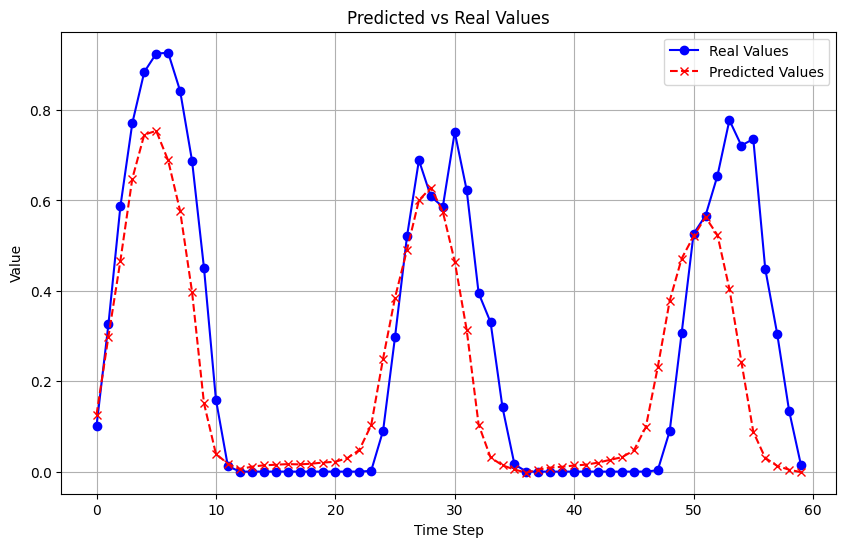

In [95]:
print(len(real_values))
print(len(predictions))

# Plotting predicted vs real values
plt.figure(figsize=(10, 6))
plt.plot(range(n_steps), real_values, label="Real Values", color='blue', marker='o', linestyle='-', markersize=6)
plt.plot(range(n_steps), predictions, label="Predicted Values", color='red', marker='x', linestyle='--', markersize=6)
plt.title('Predicted vs Real Values')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()
